# F20AA Applied Text Analytics: Coursework 2
## Amazon Fine Food Review
Text analytics focuses on the mining, processing, training and inference on textual data. Text is one of the largest sources of unstructured data, hence it is an important source of information to derive insights and recognise patterns. Some applications of text analytics includes sentiment analysis, language modeling, and sequence generation. Given the nature of subjectivity and diversity of natural language, text analytics is not one-size-fits-all, instead it requires careful experimentation and trial and error to build models. 

With the growth of social media, online reviews are some of the popular methods for leaving sentimental commentary on a product, this can be really important for businesses to keep track of consumer trends and satisfaction, especially on large platforms such as Amazon. In fact, a popular dataset consists of reviews of fine foods on Amazon from 1999 to 2012. In this coursework, we will be employing a series of applied text analytics approaches and discussing the effect of each on this food review dataset.

###### Reference used: https://www.ecosia.org/search?q=Text+Analytics%3A+Unlocking+the+Value+of+Unstructured+Data&addon=chrome&addonversion=4.0.7&method=topbar
###### Reference used: https://snap.stanford.edu/data/web-FineFoods.html


In [ ]:
# importing relevant libraries
# please install the libraries by running
# '%pip install <library name>' in a code kernel if they have not been installed already
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
#library that contains punctuation
import string
from wordcloud import WordCloud
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
print("SpaCy version: {}".format(spacy.__version__))
print("nltk version: {}".format(nltk.__version__))
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import time
from nltk import ngrams
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
SpaCy version: 2.2.4
nltk version: 3.2.5
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# # loading the drive for the train and test files
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # loading the train and test files
# train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
# test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

## 1. Data Exploration and Visualization

In [ ]:
# Loading the train.csv into a dataframe
train = pd.read_csv('./content/train.csv')

In [ ]:
# Displaying first 5 rows of the dataframe
train.head()

Score                                        Review_text
0      5  I received this product early from the seller!...
1      5  *****<br />Numi's Collection Assortment Melang...
2      5  I was very careful not to overcook this pasta,...
3      5  Buying this multi-pack I was misled by the pic...
4      5  These bars are so good! I loved them warmed up...

In [ ]:
# Displaying the information on the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426340 entries, 0 to 426339
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Score        426340 non-null  int64 
 1   Review_text  426340 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.5+ MB


In [ ]:
# Displaying the summary statistics of the dataframe
train.describe()

Score
count  426340.000000
mean        4.180928
std         1.312447
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000

In [ ]:
# Getting the first row of the dataframe
train.loc[0]

Score                                                          5
Review_text    I received this product early from the seller!...
Name: 0, dtype: object

In [ ]:
# Getting the first review of "Review_text" in the dataframe
train.loc[0,'Review_text']

'I received this product early from the seller! They are a very tastey & a Great mid-day snack. I have shared them with my Glutten Free Friends & they will be ordering this product & more very soon. Very Good'

In [ ]:
# Getting the second row of the dataframe
train.loc[1]

Score                                                          5
Review_text    *****<br />Numi's Collection Assortment Melang...
Name: 1, dtype: object

In [ ]:
# Getting the second review of "Review_text" in the dataframe
train.loc[1,'Review_text']

'*****<br />Numi\'s Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen\'s Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Breakfast: Yunnan Black Tea<br />* Smoky Tarry: Lapsang Souchong Black Tea<br /><br />This is a total of nine different teas, two tea bags of each one in each box. Numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas I have ever tried. They do not include artificial ingredients or flavorings.<br /><br />On the box, the manufacturer writes: "From mist-covered mountains to sun-drenched deserts

### Observations:
*   As seen above, there are many HTML element tags present in the second review. We can assume that there may be more tags in other reviews as well, so we will remove these HTML tags during the data pre-processing stage.

In [ ]:
# Displaying the grouping of the train data by score
train.groupby('Score').describe()

Review_text                                                             \
            count  unique                                                top   
Score                                                                          
1           39391   28612  This review will make me sound really stupid, ...   
2           22438   16391  I only used two maybe three tea bags and got p...   
3           31938   23284  When I bought the first box I had a cup of tea...   
4           60449   43971  Stash Chamomile Herbal Tea is tea bags with dr...   
5          272124  196676  The pet food industry can be one of the most i...   

            
      freq  
Score       
1      152  
2       22  
3       22  
4       27  
5       33

### Note:
* ##### Count: Number of reviews that have a particular score (Eg: Score 1 attributes to 39391 reviews)
* ##### Unique: Number of unique reviews that have a particular score (Eg: Score 1 attributes to 28612 reviews)
* ##### Top: Most frequent review
* ##### Freq: Frequency of the top review

### Observations:
* As you can see from the frequency column, there are a fair number of duplicate reviews (review with score 1 has 151 other duplicates) in our dataset. We will remove this redundancy issue during data pre-processing section.

* Since score (class variable) is numbered from 1-5, we will represent these class variables by the following methods:
    * Label Encoding
    * One Hot Encoding

### Initial Exploration on test.csv

In [ ]:
# Loading the test.csv into a dataframe
train = pd.read_csv('./content/train.csv')

# Loading the test.csv into a dataframe
test = pd.read_csv('./content/test.csv')

In [ ]:
# Displaying first 5 rows of the dataframe
test.head()

Review_text
0  This is a good tasting K-cup from a guy who dr...
1  these are a wonderful light crunchy breadstick...
2  Love this product! And has anyone mentioned th...
3  I just bought this and have used it around the...
4  great product.  actually we've used it all now...

In [ ]:
# Displaying the information on the dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142114 entries, 0 to 142113
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review_text  142114 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:
# Displaying the summary statistics of the dataframe
test.describe()

Review_text
count                                              142114
unique                                             119898
top     This review will make me sound really stupid, ...
freq                                                   47

In [ ]:
# Getting the first row of the dataframe
test.loc[0]

Review_text    This is a good tasting K-cup from a guy who dr...
Name: 0, dtype: object

In [ ]:
# Getting the first review of "Review_text" in the dataframe
test.loc[0,'Review_text']

'I received this product early from the seller! They are a very tastey & a Great mid-day snack. I have shared them with my Glutten Free Friends & they will be ordering this product & more very soon. Very Good'

In [ ]:
# Getting the second row of the dataframe
test.loc[1]

Review_text    these are a wonderful light crunchy breadstick...
Name: 1, dtype: object

In [ ]:
# Getting the second review of "Review_text" in the dataframe
test.loc[1,'Review_text']

'these are a wonderful light crunchy breadstick. that have a superior flavor and texture. I can eat these a box at a time'

### Visualisation on both dataframes

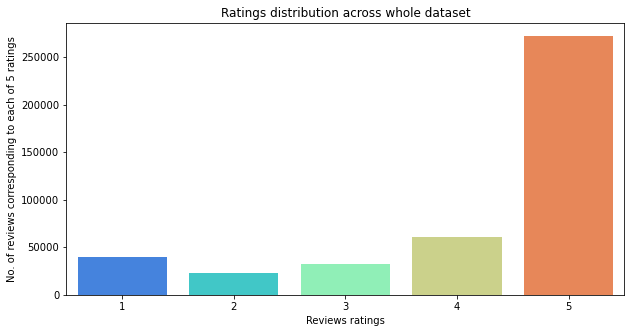

In [ ]:
# Creating a bar plot for the ratings distribution of the scores across the whole dataset
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Score',data=train,palette='rainbow')
#sns.countplot()
plt.title('Ratings distribution across whole dataset')
plt.xlabel('Reviews ratings')
plt.ylabel("No. of reviews corresponding to each of 5 ratings")
plt.show()

#### Observations:
* The above bar graph clearly represents the imabalanced/skewed data (There are 25k reviews having score 2 almost 270k reviews with score 5). To evaluate models we will use evaluation metrics other than accuracy like precision, recall and F1-Score since these take the misclassified data into account (False Positive and False Negative).


In [ ]:
# Creating a new column 'length' that contains the length of each review (for visualization)
train['Length'] = train['Review_text'].apply(len)

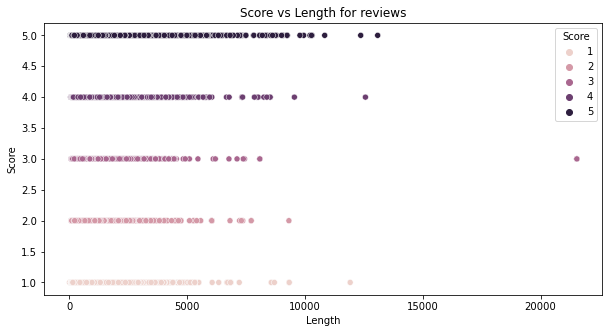

In [ ]:
# Visualizing how the length and score of each review is related to one another by using a scatterplot.
plt.figure(figsize=(10,5))
sns.scatterplot(data=train, x="Length", y="Score", hue="Score").set(title = "Score vs Length for reviews")
plt.show()

In [ ]:
# Finding out the outliers from our train dataset
outlier1= train[(train["Score"] == 1) & (train['Length'] > 10000)]
outlier2= train[(train["Score"] == 2) & (train['Length'] > 8000)]
outlier3= train[(train["Score"] == 3) & (train['Length'] > 20000)]
outlier4= train[(train["Score"] == 4) & (train['Length'] > 10000)]
outlier5= train[(train["Score"] == 5) & (train['Length'] > 13000)]

In [ ]:
# Printing out the detected outliers
print(outlier1,'\n\n')
print(outlier2,'\n\n')
print(outlier3,'\n\n')
print(outlier4,'\n\n')
print(outlier5,'\n\n')

        Score                                        Review_text  Length
349984      1  I must admit, I haven't gotten many gift baske...   11915 


        Score                                        Review_text  Length
265761      2  To be honest, I have never knowingly tried Cey...    9315 


        Score                                        Review_text  Length
21756       3  Fuzzy Wuzzy's Summary:<br />*** Somewhat recom...   21535
66592       3  Fuzzy Wuzzy's Summary:<br />*** Somewhat recom...   21535
175574      3  Fuzzy Wuzzy's Summary:<br />*** Somewhat recom...   21535 


       Score                                        Review_text  Length
61339      4  PROS:<br />Very nearly like sugar<br />Works g...   12563 


       Score                                        Review_text  Length
36341      5  Tea Antioxidants<br />----------------<br /><b...   13082 




#### Observations:

We notice few outliers in each of the categories (score) but the most prominent one is the review with Score 3. From the above cell we can see that the review with score 3 has duplicates of itself.


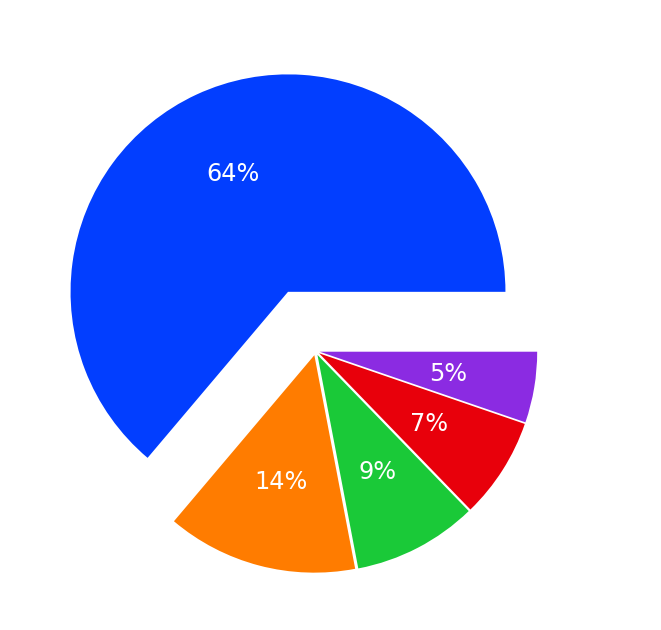

In [ ]:
# Creating labels for Pie Plot
labels_num = train["Score"].value_counts().index.tolist()

labels = []
for i in labels_num:
    labels.append(f"Score: {i}")

# Setting color scheme for the pie plot
colors = sns.color_palette('bright')

# For adding highting to the most dense review count
explode = [0.3,0.02,0.02,0.02,0.02]

# Plotting the pie chart
plt.figure(figsize=(20,10))
plt.title("Pie Plot to show Proportion of each Score", pad=50, fontsize=30, color= 'white')
plt.pie(train["Score"].value_counts(),colors = colors, labels = labels, autopct = '%0.0f%%', explode = explode, textprops={'fontsize': 24, 'color': 'white'})
plt.show()

#### Observations:
* Score 5 has the largest target distribution (by 64%) across all movie reviews.
* Score 2 has the lowest target distribution (by 5%) across all movie reviews.

In [ ]:
# Function for automatically generating word clouds based on the word and text provided
def generate_word_cloud(word,text):
    wordcloud = WordCloud(
        background_color='white',
        width = 3000,
        height = 2000).generate(str(word))
    fig = plt.figure(
        figsize = (15, 12),
        facecolor = 'k',
        edgecolor = 'k')
    plt.title(text, color="white", fontsize=30, pad=20)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
# https://www.kaggle.com/sonalisingh1411/nlp-part-1-amazon-fine-food-sentiment-analysis

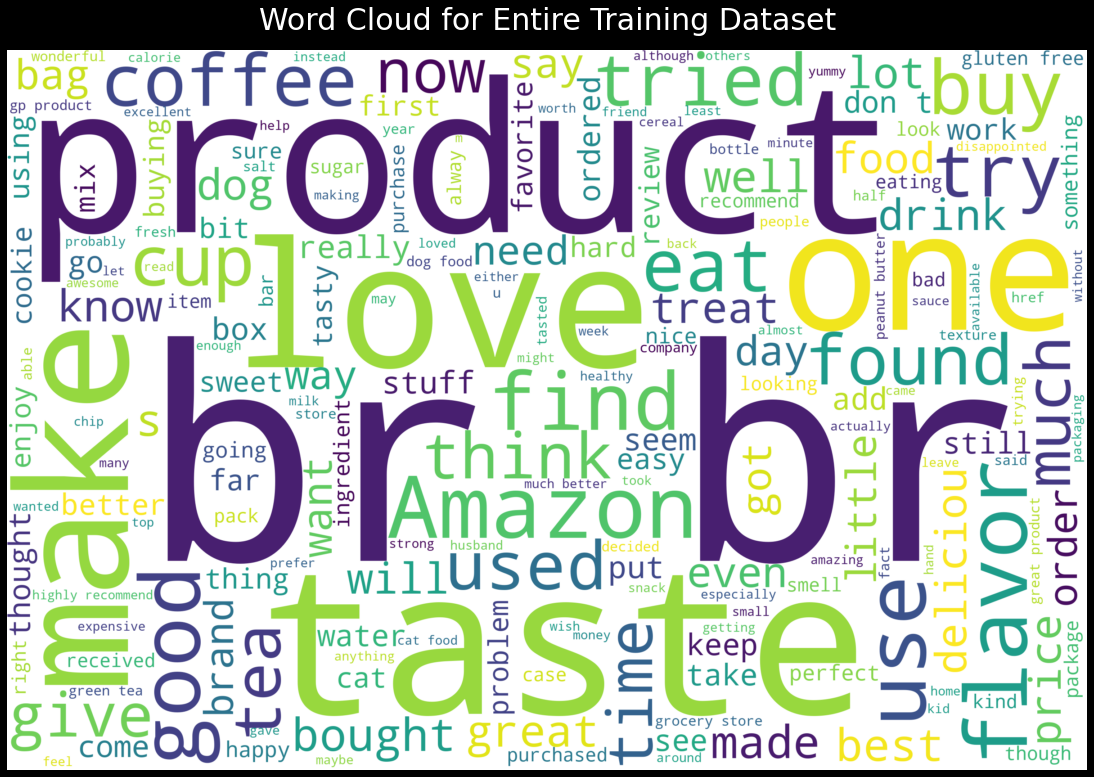

In [ ]:
# Displaying the word cloud for the entire training dataset
texts = train['Review_text'].to_list()
generate_word_cloud(texts,"Word Cloud for Entire Training Dataset")

#### Observations:
* From the above Word Cloud, the most prominent word across all the reviews are:
    * br: Because almost every review contains HTML "br" tags.
    * product: Because reviews are based on food products.
    * love: Because the majority class is Score 5, and the word love is the most prominent word in the reviews with score 5.
    * make: Because we have food related reviews, and probably food ingredients are used to make dishes and the reviews are based on the ingredients(probably).
    * taste: Because food reviews are related to taste of the food.
    * one: Probably because some people rate either 1 star for the reviews or they order single dishes/food item.

### WordClouds for Each Score





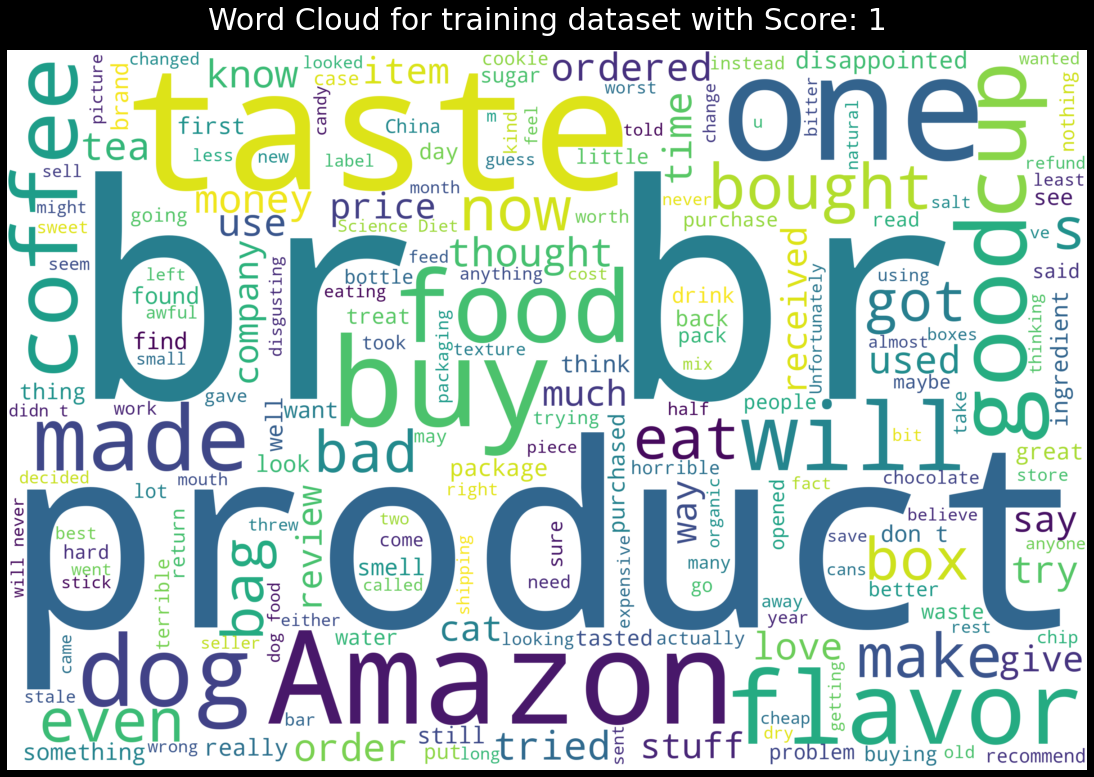

In [ ]:
# Displaying the word cloud for the reviews with score 1
texts = train[train["Score"] == 1]
texts = texts['Review_text'].to_list()
generate_word_cloud(texts, "Word Cloud for training dataset with Score: 1")

#### Observations:
* From the above Word Cloud, the most prominent word across all the reviews with score 1 are:
    * br: Because almost every review contains HTML "br" tags.
    * product: Because reviews are based on food products.
    * Amazon: Probably because they had a bad experience with Amazon food reviews.
    * flavor and taste: Because food reviews are based on flavor/taste of the food.
    * one: Probably because people rate the reviews as 1 star.

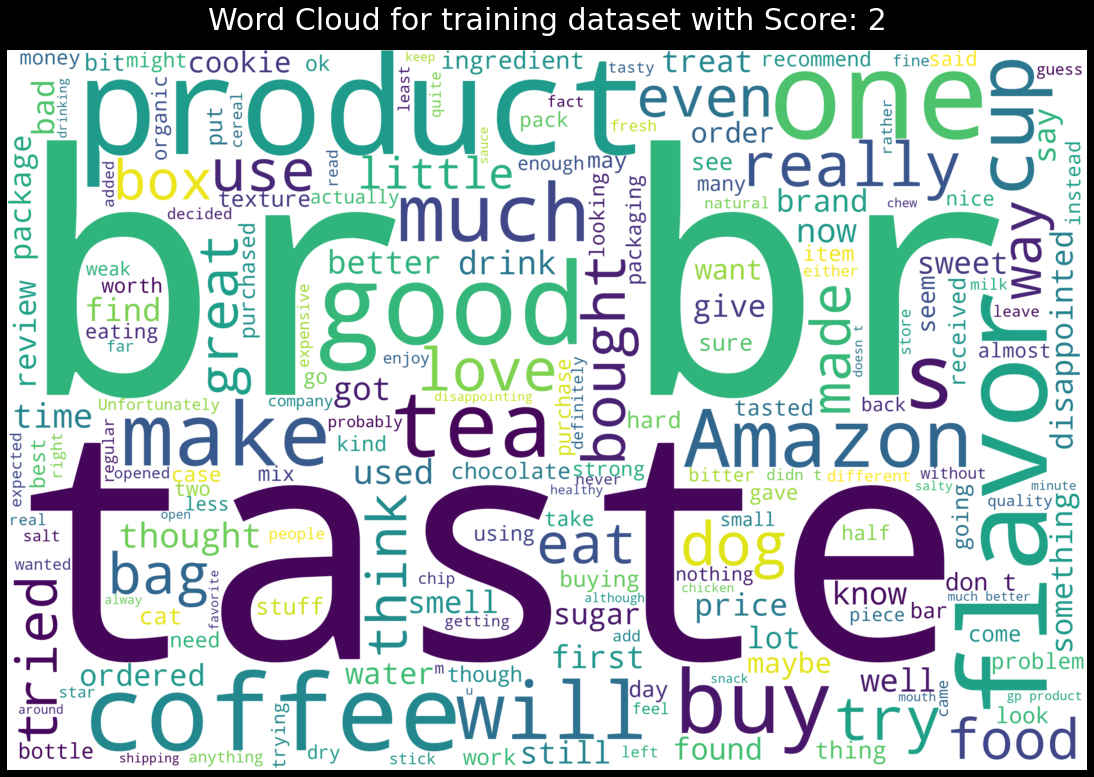

In [ ]:
# Displaying the word cloud for the reviews with score 2
texts = train[train["Score"] == 2]
texts = texts['Review_text'].to_list()
generate_word_cloud(texts, "Word Cloud for training dataset with Score: 2")

#### Observations:
* From the above Word Cloud, the most prominent word across all the reviews with score 2 are:
    * br: Because almost every review contains HTML "br" tags.
    * product: Because reviews are based on food products.
    * coffee: Because the reviews with score 2 were mostly based on coffee/coffee products.
    * flavor and taste: Because food reviews are based on flavor/taste of the food.
    * one: Probably because some people rate either 1 star for the reviews or they order single dishes/food item.

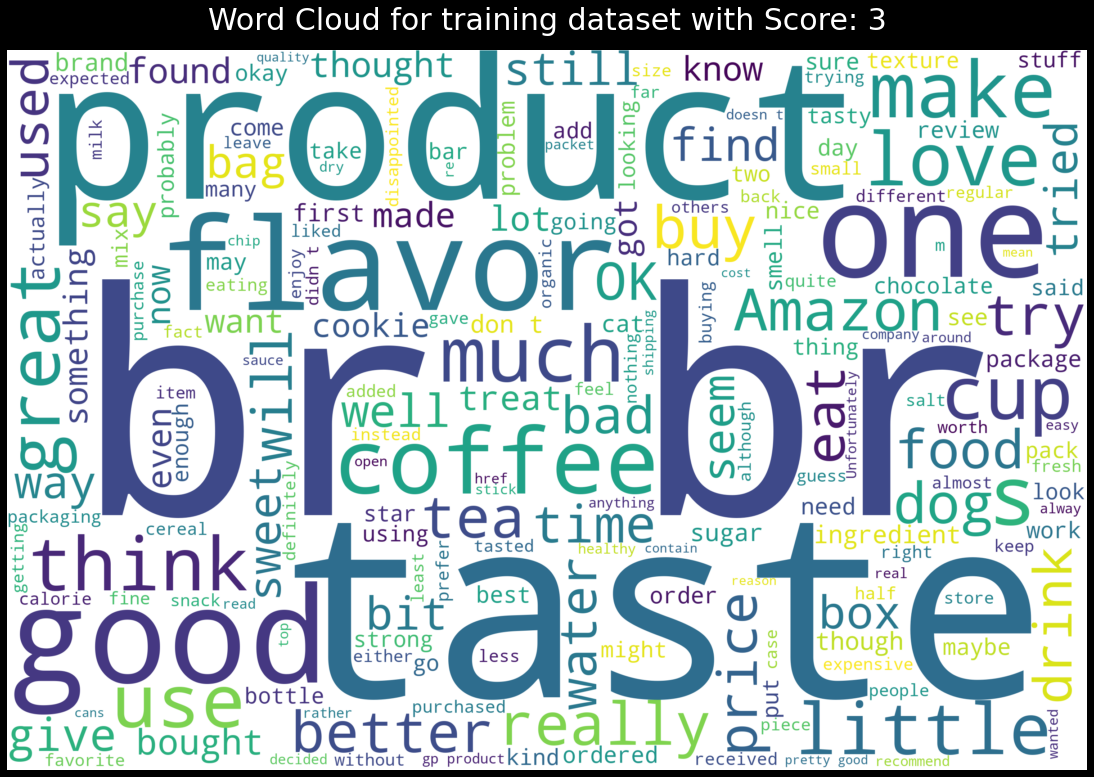

In [ ]:
# Displaying the word cloud for the reviews with score 3
texts = train[train["Score"] == 3]
texts = texts['Review_text'].to_list()
generate_word_cloud(texts, "Word Cloud for training dataset with Score: 3")

#### Observations:
* From the above Word Cloud, the most prominent word across all the reviews with score 3 are:
    * br: Because almost every review contains HTML "br" tags.
    * product: Because reviews are based on food products.
    * good and great: Because the reviews with score 3 were mostly positive reviews (with words like 'good' and 'great').
    * flavor and taste: Because food reviews are based on flavor/taste of the food.
    * one: Probably because some people rate either 1 star for the reviews or they order single dishes/food item.

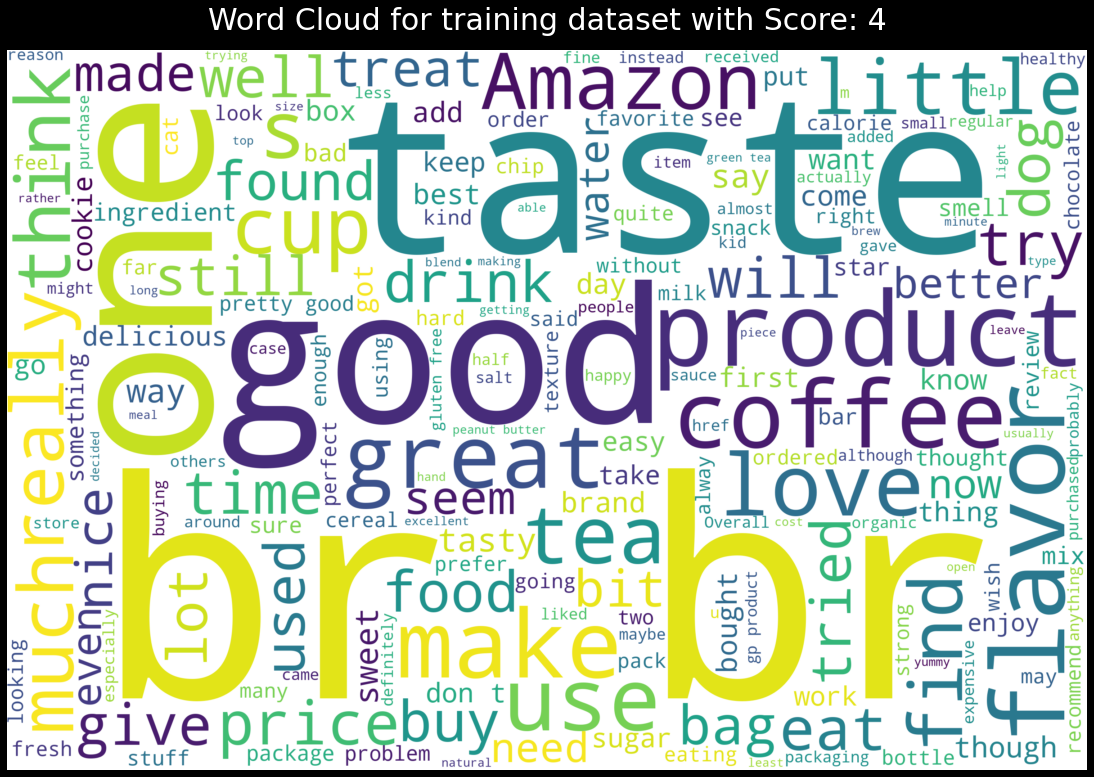

In [ ]:
# Displaying the word cloud for the reviews with score 4
texts = train[train["Score"] == 4]
texts = texts['Review_text'].to_list()
generate_word_cloud(texts, "Word Cloud for training dataset with Score: 4")

#### Observations:
* From the above Word Cloud, the most prominent word across all the reviews with score 4 are:
    * br: Because almost every review contains HTML "br" tags.
    * product: Because reviews are based on food products.
    * good and great: Because the reviews with score 4 were mostly positive reviews (with words like 'good' and 'great').
    * flavor and taste: Because food reviews are based on flavor/taste of the food.
    * one: Probably because some people rate either 1 star for the reviews or they order single dishes/food item.

The 4 star reviews have more positive words as compared to the previos ones, like "perfect" and "tasty".

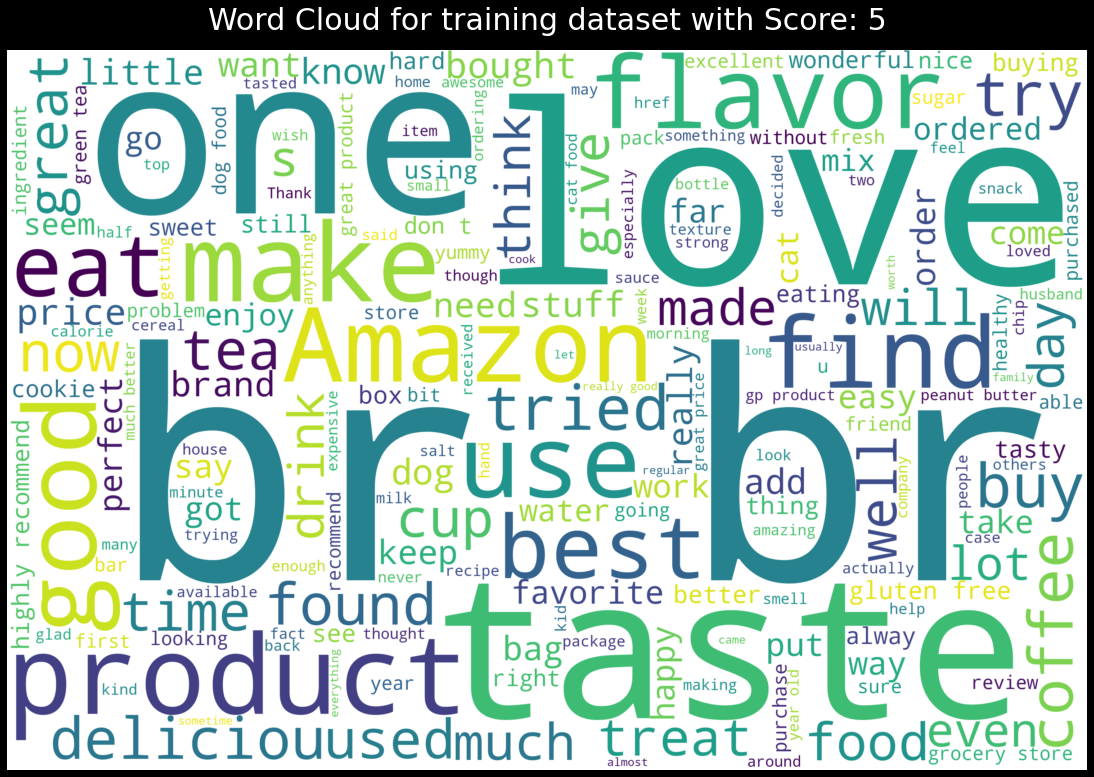

In [ ]:
# Displaying the word cloud for the reviews with score 5
texts = train[train["Score"] == 5]
texts = texts['Review_text'].to_list()
generate_word_cloud(texts, "Word Cloud for training dataset with Score: 5")

#### Observations:
* From the above Word Cloud, the most prominent word across all the reviews with score 5 are:
    * br: Because almost every review contains HTML "br" tags.
    * product: Because reviews are based on food products.
    * love: Because 5 star reviews are mostly positive reviews with adjectives like 'love', 'delicious' etc.
    * flavor and taste: Because food reviews are based on flavor/taste of the food.
    * one: Probably because some people rate either 1 star for the reviews or they order single dishes/food item.

The 5 star reviews have the most number of positive words from all the words clouds.

## 2. Text Processing and Normalization
In this section, we will be looking into the different techniques for text processing and normalisation, such as data cleaning, tokenisation, stemming etc. This helps us to create a corpus of text that can be easily fed into a machine learning model and used for further analysis and inference. 
 

### Data Cleaning
As per our observations from part 1, we can note that the data needs to be cleaned to follow a uniform grammar that follows natural language. Moreover, duplicate values need to be removed. Hence, we will be cleaning up the review sentences by removing HTML, non-alphabetic and punctuation characters. 

TODO:
Thoroughly experiment with different text processing and normalization alternatives. Explain the 
trade-off and benefits of using each and justify their effectiveness for the current data set. 

In [ ]:
# count of duplicates
train.duplicated().value_counts()

False    308934
True     117406
dtype: int64

We can see there 117406 duplicate values in the dataset

In [ ]:
train_unique = train.drop_duplicates(keep ='first')
train_unique.duplicated().value_counts()

False    308934
dtype: int64

Now we have 308934 unique reviews

In [ ]:
def cleanup(review):
    
    # Writing to lower case
    review = review.lower()
    
    # Removing contractions
    # The 's can be expanded to denote posession or to contract 'is'
    # Neither of these add meaning and are removed in stop work removal 
    # Hence for simplicity they are not expanded and are simply deleted. 
    review = re.sub(r"won't", "will not", review)
    review = re.sub(r"n't", " not", review)
    review = re.sub(r"\'re", " are", review)
    review = re.sub(r"\'s", "", review) 
    review = re.sub(r"\'d", " would", review)
    review = re.sub(r"\'ll", " will", review)
    review = re.sub(r"\'ve", " have", review)
    review = re.sub(r"\'m", " am", review)
    
    # Remove HTML tags
    review = re.sub(r"<.*?>",' ',review)
    
    # Remove punctuations, numbers, and non alphanumeric characters
    review = re.sub(r"[^a-zA-Z]",' ',review)
    
    # Remove words with numbers
    review = re.sub(r"\S*\d\S*",' ',review)
    
    # Remove URLs
    review = re.sub(r"http\S+", " ", review)
    review = re.sub(r"www.\S+", " ", review)    
    
    return review

In [ ]:
train_unique['clean_reviews'] = train_unique['Review_text'].apply(cleanup)
test['clean_reviews'] = test['Review_text'].apply(cleanup)

In [ ]:
train_unique.head()

Score                                        Review_text  \
0      5  I received this product early from the seller!...   
1      5  *****<br />Numi's Collection Assortment Melang...   
2      5  I was very careful not to overcook this pasta,...   
3      5  Buying this multi-pack I was misled by the pic...   
4      5  These bars are so good! I loved them warmed up...   

                                       clean_reviews  
0  i received this product early from the seller ...  
1        numi collection assortment melange inclu...  
2  i was very careful not to overcook this pasta ...  
3  buying this multi pack i was misled by the pic...  
4  these bars are so good  i loved them warmed up...

In [ ]:
test.head()

Id                                        Review_text  \
0   1  I have a very picky German Shephard mix and sh...   
1   2  It is hard to believe that this candy is sugar...   
2   3  These are delicious cookies but I just cancell...   
3   4  I should have ordered more of these bones as m...   
4   5  One big complaint I have about protein bars is...   

                                       clean_reviews  
0  i have a very picky german shephard mix and sh...  
1  it is hard to believe that this candy is sugar...  
2  these are delicious cookies but i just cancell...  
3  i should have ordered more of these bones as m...  
4  one big complaint i have about protein bars is...

### Tokenisation
Tokenisation is an NLP technique used for creating structure in textual data. Essentially, tokenisation converts a string of text to a list of tokens that can be fed into a model. In this subsection we experiment with different types of tokenisation methods



#### Sentence Tokenisation
Sentence tokenisation is when each entry is divided into sentences, and each sentence is considered as a single token. This is suitable for large corpuses where the collective meaning of the sentences is more effective than the meaning of each word. This can effectively reduce the number of tokens generated as well.

NLTK is another NLP library in Python which is meant for quick and easy application of text analytics. It is relatively easy to use, and sacrifices efficiency for intuitive data structures. However, it is powerful on smaller datasets, and provides abundant function for tokenisation. Here we will be using the sentence tokenizer by NLTK

In [ ]:
text = train_unique.loc[0,'clean_reviews']
text

'i received this product early from the seller  they are a very tastey   a great mid day snack  i have shared them with my glutten free friends   they will be ordering this product   more very soon  very good'

In [ ]:
# sentence tokenisation
from nltk.tokenize import sent_tokenize
sent_tokenize(text)

['i received this product early from the seller  they are a very tastey   a great mid day snack  i have shared them with my glutten free friends   they will be ordering this product   more very soon  very good']

In our scenario, given the varying length of each entry, as well as the depth of meaning in each word, sentence tokeniser will not be able to capture the depth of our text compared to other alternatives. Moreover, since we ultimately want to build a Bag of Words model, it is essential that we create word-level tokens. Finally, removing punctuation from cleaning actually worsens the sentence tokenizer as it tokenizes the entire sentence as one. Hence we move on to other alternatives

#### Spacy Tokenizer
Spacy is an NLP library in Python meant for processing large corpi of text. It uses efficient model algorithms and data structures that allows users to easily perform NLP related tasks. As part of their library, they also offer tokenisation based on the English language. The tokenizers are customisable, however the standard Spacy Tokenizer is based on splitting words with whitespace and punctuation marks. 


In [ ]:
# spacy
from spacy.lang.en import English
vocab = English()

# Create a Tokenizer with the default settings for English
# does NOT need modifications since the text is written using natural English
tokenizer = vocab.tokenizer

tokenizer(text)

i received this product early from the seller  they are a very tastey   a great mid day snack  i have shared them with my glutten free friends   they will be ordering this product   more very soon  very good

In [ ]:
# nlp = spacy.load("en_core_web_sm", exclude=["parser", "ner", "attrbute_ruler"])

start_time = time.time()

# apply tokenizer
train_unique['spacy_tokens'] = train_unique['clean_reviews'].apply(tokenizer)

print("Time taken to run Spacy tokenisation (converting to spacy tokens) is ", time.time() - start_time, " s")

Time taken to run Spacy tokenisation (converting to spacy tokens) is  53.00426244735718  s


In [ ]:
train_unique.head()

Score                                        Review_text  \
0      5  I received this product early from the seller!...   
1      5  *****<br />Numi's Collection Assortment Melang...   
2      5  I was very careful not to overcook this pasta,...   
3      5  Buying this multi-pack I was misled by the pic...   
4      5  These bars are so good! I loved them warmed up...   

                                       clean_reviews  \
0  i received this product early from the seller ...   
1        numi collection assortment melange inclu...   
2  i was very careful not to overcook this pasta ...   
3  buying this multi pack i was misled by the pic...   
4  these bars are so good  i loved them warmed up...   

                                        spacy_tokens  
0  (i, received, this, product, early, from, the,...  
1  (      , numi, collection, assortment, melange...  
2  (i, was, very, careful, not, to, overcook, thi...  
3  (buying, this, multi, pack, i, was, misled, by...  
4  (these, bars, are, so, good,  , i, loved, them...

#### Word Tokenizer
NLTK also provides a word tokenizer. This tokenizes on white space using regex. It essentially first tokenizes sentences using sent_tokenizer and then applies regex rules from the Treebank algorithm to further tokenize the text.

In [ ]:
nltk.word_tokenize(text)

['i',
 'received',
 'this',
 'product',
 'early',
 'from',
 'the',
 'seller',
 'they',
 'are',
 'a',
 'very',
 'tastey',
 'a',
 'great',
 'mid',
 'day',
 'snack',
 'i',
 'have',
 'shared',
 'them',
 'with',
 'my',
 'glutten',
 'free',
 'friends',
 'they',
 'will',
 'be',
 'ordering',
 'this',
 'product',
 'more',
 'very',
 'soon',
 'very',
 'good']

In [ ]:
# nltk

start_time = time.time()

# apply tokenizer
train_unique['nltk_tokens'] = train_unique['clean_reviews'].apply(nltk.word_tokenize)

print("Time taken to run NLTK tokenisation is ", time.time() - start_time, " s")

Time taken to run NLTK tokenisation is  107.54620790481567  s


In [ ]:
train_unique.head()

Score                                        Review_text  \
0      5  I received this product early from the seller!...   
1      5  *****<br />Numi's Collection Assortment Melang...   
2      5  I was very careful not to overcook this pasta,...   
3      5  Buying this multi-pack I was misled by the pic...   
4      5  These bars are so good! I loved them warmed up...   

                                       clean_reviews  \
0  i received this product early from the seller ...   
1        numi collection assortment melange inclu...   
2  i was very careful not to overcook this pasta ...   
3  buying this multi pack i was misled by the pic...   
4  these bars are so good  i loved them warmed up...   

                                        spacy_tokens  \
0  (i, received, this, product, early, from, the,...   
1  (      , numi, collection, assortment, melange...   
2  (i, was, very, careful, not, to, overcook, thi...   
3  (buying, this, multi, pack, i, was, misled, by...   
4  (these, bars, are, so, good,  , i, loved, them...   

                                         nltk_tokens  
0  [i, received, this, product, early, from, the,...  
1  [numi, collection, assortment, melange, includ...  
2  [i, was, very, careful, not, to, overcook, thi...  
3  [buying, this, multi, pack, i, was, misled, by...  
4  [these, bars, are, so, good, i, loved, them, w...

#### Keras Tokenizer
Keras is a Python library for implementing deep learning models. It also provides important NLP functions such as tokenizers. Keras tokenizers convert a piece of text to a sequence of integer values, where each word is encoded as an integer (or binary). This creates a ready to use tokenizer that works for models.

In [ ]:
from keras.preprocessing.text import Tokenizer

start_time = time.time()

tokenizer = Tokenizer(num_words=6000)
tokenizer.fit_on_texts(train_unique['clean_reviews'])

word_index = tokenizer.word_index
train_unique['keras_tokens'] = tokenizer.texts_to_sequences(train_unique['clean_reviews'])

print("Time taken to run Keras tokenisation is ", time.time() - start_time, " s")
vocab_size = len(tokenizer.word_index) + 1
print("The size of the vocabulary is", vocab_size, "words")

Time taken to run Keras tokenisation is  38.96250915527344  s
The size of the vocabulary is 100639 words


In [ ]:
print("Original Text")
print(train_unique.loc[4,'clean_reviews'])
print()
print("Spacy Tokens")
print(train_unique.loc[4,'spacy_tokens'])
print()
print("NLTK Tokens")
print(train_unique.loc[4,'nltk_tokens'])
print()
print("Keras Tokens")
print(train_unique.loc[4,'keras_tokens'])

Original Text
these bars are so good  i loved them warmed up  i definitely think these are a great snack or breakfast  i received this product for free from influenster  yum     

Spacy Tokens
these bars are so good  i loved them warmed up  i definitely think these are a great snack or breakfast  i received this product for free from influenster  yum     

NLTK Tokens
['these', 'bars', 'are', 'so', 'good', 'i', 'loved', 'them', 'warmed', 'up', 'i', 'definitely', 'think', 'these', 'are', 'a', 'great', 'snack', 'or', 'breakfast', 'i', 'received', 'this', 'product', 'for', 'free', 'from', 'influenster', 'yum']

Keras Tokens
[28, 277, 19, 25, 26, 2, 297, 29, 3676, 65, 2, 223, 125, 28, 19, 4, 27, 180, 32, 377, 2, 309, 9, 37, 11, 110, 46, 4151, 518]


In [ ]:
train_unique.head()

Score                                        Review_text  \
0      5  I received this product early from the seller!...   
1      5  *****<br />Numi's Collection Assortment Melang...   
2      5  I was very careful not to overcook this pasta,...   
3      5  Buying this multi-pack I was misled by the pic...   
4      5  These bars are so good! I loved them warmed up...   

                                       clean_reviews  \
0  i received this product early from the seller ...   
1        numi collection assortment melange inclu...   
2  i was very careful not to overcook this pasta ...   
3  buying this multi pack i was misled by the pic...   
4  these bars are so good  i loved them warmed up...   

                                        spacy_tokens  \
0  (i, received, this, product, early, from, the,...   
1  (      , numi, collection, assortment, melange...   
2  (i, was, very, careful, not, to, overcook, thi...   
3  (buying, this, multi, pack, i, was, misled, by...   
4  (these, bars, are, so, good,  , i, loved, them...   

                                         nltk_tokens  \
0  [i, received, this, product, early, from, the,...   
1  [numi, collection, assortment, melange, includ...   
2  [i, was, very, careful, not, to, overcook, thi...   
3  [buying, this, multi, pack, i, was, misled, by...   
4  [these, bars, are, so, good, i, loved, them, w...   

                                        keras_tokens  
0  [2, 309, 9, 37, 1485, 46, 1, 745, 21, 19, 4, 3...  
1  [2268, 2593, 1761, 2202, 1274, 406, 550, 110, ...  
2  [2, 20, 34, 1087, 10, 6, 9, 370, 338, 200, 6, ...  
3  [226, 9, 2427, 191, 2, 20, 91, 1, 914, 18, 199...  
4  [28, 277, 19, 25, 26, 2, 297, 29, 3676, 65, 2,...

Based on the different tokenizers we came up with the following list of advantages and disadvantages for using each tokenizer based on our task.

Sentence tokenizer is useful for large size corpus, and only makes sense with the punctuation marks intact. In our case, we remove non-alphabetical characters, which creates an entire entry as one token. Moreover, since we ultimately want to build a Bag of Words model, it is essential that we create word-level tokens. 

Spacy's word tokenizer is efficient compared to other methods and is customisable (albeit difficult to do so). The standard word tokenizer splits on white spacy and punctuation marks. However, it cannot ignore multiple white space characters and considers them their own token.

NLTK's word tokenizer uses regex for splitting the tokens. It is less efficient compared to Spacy however it can recognise and ignore multiple white space characters, and only creates tokens of words. 

Finally, keras tokens converts text into a vector of integers, which makes it ready for computation by reducing each unique word to its integer representations. 

### Stop word removals
Stopwords refers to common terms in a language that do not add meaning to the sentiment of a sentence. For example, words such as "is, are, can, do" do not affect the sentiment of the sentence as powerfully as "like, hate, care" do. Removing these terms helps us limit the size of the vocabulary for the model and helps decrease noisy words in the corpus. In this subsection we go over the list of stop words offered by NLTK and Spacy.

In [ ]:
# comparing nltk and spacy stopwords
en = spacy.load('en_core_web_sm')
spacy_stopwords = en.Defaults.stop_words
nltk_stopwords = set(stopwords.words('english'))
common_stopwords = [word for word in spacy_stopwords if word in nltk_stopwords]

print("There are a total of", len(nltk_stopwords),"stop words in NLTK and",len(spacy_stopwords),"stop words in Spacy")
print()
print("There are", len(common_stopwords), " common stopwords")
print(common_stopwords)
print()
print("The unique stop words in Spacy are:")
print([word for word in spacy_stopwords if word not in nltk_stopwords])
print()
print("The unique stop words in NLTK are:")
print([word for word in nltk_stopwords if word not in spacy_stopwords])

There are a total of 179 stop words in NLTK and 326 stop words in Spacy

There are 123  common stopwords
['hers', 'this', 'both', 'few', 'for', 'against', 'them', 'same', 'than', 'himself', 'as', 'your', 'into', 'too', 'once', 'him', 'no', 'i', 'being', 'have', 'should', 'until', 'there', 'their', 'from', 'ourselves', 'is', 'we', 'in', 'doing', 'it', 'more', 'ours', 'its', 'herself', 'that', 'you', 'each', 'why', 'yourselves', 'had', 'only', 'such', 'are', 'what', 'me', 'itself', 'her', 'some', 'on', 'just', 'can', 'of', 'the', 'during', 'again', 'through', 'own', 'to', 'with', 'further', 'where', 'my', 'about', 'am', 'off', 'most', 'between', 'so', 'here', 'our', 'now', 'under', 'themselves', 'do', 'does', 'yours', 'an', 'these', 'all', 'his', 'be', 'were', 'if', 'by', 'but', 'over', 'after', 'did', 'at', 'while', 'other', 'out', 'how', 'yourself', 'she', 'or', 'not', 'who', 'those', 'has', 'above', 'any', 'he', 'before', 'then', 'been', 'was', 're', 'which', 'when', 'will', 'very', '

From our initial analysis, we find that there are nearly double the number of stop words in Spacy compared to NLTK. Out of these, 123 of them are common, and are considered to be some of the standard stopwords in English. This adds more robustness to Spacy's list, however some words on Spacy's list require discourse.

In particular, we noticed words such as "never", "nevertheless", and "moreover" which might not add meaning to the sentiment alone, but are important negations or conjunctions that can change the effect of the sentiment. In fact, negative stop words such as "never" and "not" add additional meaning to the sentence that once removed can change the meaning. This was explored further in research, suggesting that such words carry meaning for sentiment analysis and text classification. 

Although both the lists contain the word "not", more negative terms such as "never", "nobody", "noone" exist with Spacy, which makes it less desirable than NLTK for our task.

We will also observe the effect of removing these stop words on the classification performance with their respective tokens as well.


###### Reference Used: https://www.cs.cmu.edu/~ark/EMNLP-2015/proceedings/WASSA/pdf/WASSA14.pdf

In [ ]:
# spacy
def remove_stopwords(tokens):
    return [token for token in tokens if not token.is_stop]
    
start_time = time.time()

train_unique['spacy_tokens'] = train_unique['spacy_tokens'].apply(remove_stopwords)

print("Time taken to remove stop words in Spacy is ", time.time() - start_time, " ms")


Time taken to remove stop words in Spacy is  26.56568193435669  ms


In [ ]:
# nltk
stopwords = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]

start_time = time.time()
train_unique['nltk_tokens'] = train_unique['nltk_tokens'].apply(remove_stopwords)
print("Time taken to remove stop words in NLTK is ", time.time() - start_time, " ms")


Time taken to remove stop words in NLTK is  4.677317142486572  ms


In [ ]:
train_unique.head()

Score                                        Review_text  \
0      5  I received this product early from the seller!...   
1      5  *****<br />Numi's Collection Assortment Melang...   
2      5  I was very careful not to overcook this pasta,...   
3      5  Buying this multi-pack I was misled by the pic...   
4      5  These bars are so good! I loved them warmed up...   

                                       clean_reviews  \
0  i received this product early from the seller ...   
1        numi collection assortment melange inclu...   
2  i was very careful not to overcook this pasta ...   
3  buying this multi pack i was misled by the pic...   
4  these bars are so good  i loved them warmed up...   

                                        spacy_tokens  \
0  [received, product, early, seller,  , tastey, ...   
1  [      , numi, collection, assortment, melange...   
2  [careful, overcook, pasta,  , making, sure, bi...   
3  [buying, multi, pack, misled, picture, hazel, ...   
4  [bars, good,  , loved, warmed,  , definitely, ...   

                                         nltk_tokens  \
0  [received, product, early, seller, tastey, gre...   
1  [numi, collection, assortment, melange, includ...   
2  [careful, overcook, pasta, making, sure, take,...   
3  [buying, multi, pack, misled, picture, whole, ...   
4  [bars, good, loved, warmed, definitely, think,...   

                                        keras_tokens  
0  [2, 309, 9, 37, 1485, 46, 1, 745, 21, 19, 4, 3...  
1  [2268, 2593, 1761, 2202, 1274, 406, 550, 110, ...  
2  [2, 20, 34, 1087, 10, 6, 9, 370, 338, 200, 6, ...  
3  [226, 9, 2427, 191, 2, 20, 91, 1, 914, 18, 199...  
4  [28, 277, 19, 25, 26, 2, 297, 29, 3676, 65, 2,...

Another point important point to note is that Spacy although set to be more efficient with larger datasets, takes 28 seconds to run while NLTK takes around 4 seconds

### Lemmatisation
Lemmatisation is an NLP technique for reducing words to their 'lemma' or base form from the dictionary. This means, words like 'eating' and 'cleared' are converted to 'eat' and 'clear'. This steps helps in reducing the vocabulary size for the models, as well as narrowing the information to essentials. 


###### Reference used: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

#### Spacy Lemmatisation
In tokenisation with spacy, the tokens are actually spacy word objects which contain their own properties such as lemmas. Hence, it can easily access the lemma values of the model by loading the tokens. 

Another important point to note is that spacy converts all English pronouns to a special token called 'PRON'. Although this removes context, it does not affect the sentimental value. 



In [ ]:
# spacy
def lemmatize(tokens):
    return [token.lemma_ for token in tokens]

start_time = time.time()
train_unique['spacy_tokens'] = train_unique['spacy_tokens'].apply(lemmatize)
print("Time taken to run Spacy Lemmatisation is ", time.time() - start_time, " ms")


Time taken to run Spacy Lemmatisation is  28.099815130233765  ms


#### WordNet Lemmatizer
NLTK on the other hand, uses a lexical database for tokenizing with Wordnet. The wordnet lemmatizers keeps the word input unchanged if it is unrecognisable, otherwise it converts to a base form. 

One limitation of Wordnet is that it needs POS tagging to correctly identify some words. This is because the lemma changes with the context of the sentence, and unless the model is supplied with a list of POS tags, it is a gamble to convert to the right lemma.

In [ ]:
# nltk
#  Lemmatize using WordNet's built-in morphy function.
#  Returns the input word unchanged if it cannot be found in WordNet.
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

start_time = time.time()
train_unique['nltk_tokens'] = train_unique['nltk_tokens'].apply(lemmatize)
print("Time taken to run NLTK Lemmatisation is ", time.time() - start_time, " ms")

Time taken to run NLTK Lemmatisation is  60.348875284194946  ms


In [ ]:
train_unique.head()

Score                                        Review_text  \
0      5  I received this product early from the seller!...   
1      5  *****<br />Numi's Collection Assortment Melang...   
2      5  I was very careful not to overcook this pasta,...   
3      5  Buying this multi-pack I was misled by the pic...   
4      5  These bars are so good! I loved them warmed up...   

                                       clean_reviews  \
0  i received this product early from the seller ...   
1        numi collection assortment melange inclu...   
2  i was very careful not to overcook this pasta ...   
3  buying this multi pack i was misled by the pic...   
4  these bars are so good  i loved them warmed up...   

                                        spacy_tokens  \
0  [received, product, early, seller,  , tastey, ...   
1  [      , numi, collection, assortment, melange...   
2  [careful, overcook, pasta,  , making, sure, bi...   
3  [buying, multi, pack, misled, picture, hazel, ...   
4  [bars, good,  , loved, warmed,  , definitely, ...   

                                         nltk_tokens  \
0  [received, product, early, seller, tastey, gre...   
1  [numi, collection, assortment, melange, includ...   
2  [careful, overcook, pasta, making, sure, take,...   
3  [buying, multi, pack, misled, picture, whole, ...   
4  [bar, good, loved, warmed, definitely, think, ...   

                                        keras_tokens  
0  [2, 309, 9, 37, 1485, 46, 1, 745, 21, 19, 4, 3...  
1  [2268, 2593, 1761, 2202, 1274, 406, 550, 110, ...  
2  [2, 20, 34, 1087, 10, 6, 9, 370, 338, 200, 6, ...  
3  [226, 9, 2427, 191, 2, 20, 91, 1, 914, 18, 199...  
4  [28, 277, 19, 25, 26, 2, 297, 29, 3676, 65, 2,...

In [ ]:
print("Original Text")
print(train_unique.loc[6,'clean_reviews'])
print()
print("Spacy Lemmatisation")
print(train_unique.loc[6,'spacy_tokens'])
print()
print("NLTK Lemmatisation")
print(train_unique.loc[6,'nltk_tokens'])

Original Text
i am a huge fan of eating cereal for breakfast   it light  it tastes good and it fast   unfortunately the usual suspects on the market are full of sugar and they do not fill me up for more than a couple of hours  so i was in search of a cereal that will taste good  that will fill me up and will be good for me   i found this brand at publix  it was on sale so i gave it a try    it was soo good   and it fills me up until lunch time and it organic   what else can u want from a cereal    i am so happy i have found this brand and that amazon carries it in case publix discontinues selling it    tastes great and it organic  

Spacy Lemmatisation
['huge', 'fan', 'eating', 'cereal', 'breakfast', '  ', 'light', ' ', 'tastes', 'good', 'fast', '  ', 'unfortunately', 'usual', 'suspects', 'market', 'sugar', 'fill', 'couple', 'hours', ' ', 'search', 'cereal', 'taste', 'good', ' ', 'fill', 'good', '  ', 'found', 'brand', 'publix', ' ', 'sale', 'gave', 'try', '   ', 'soo', 'good', '  ', '

In lemmatisation, we find that both techniques work similar to each other with few exceptions. Firstly, Spacy keeps the tokenized white space characters, and secondly, Spacy's lemmatisation lets the words retain their tense and singularity/pluarity. This may be necessary in context driven cases such as text summarisation, however, in our case we are more concerned with the words themselves aggregating to a certain sentiment. Hence, we find that Spacy's lemmatisation fits on a larger dictionary, and we can observe the effects of this with the performance during model training.

### Stemming
Stemming is an NLP technique that reduces words to a root 'stem' that may or may not belong to a standard dictionary. It is used to reduce the corpus size and normalise data. With stemming: 'betrayal', 'betray', 'betraying', 'betrays' all converts to 'betray'. 

One of the discouse around stemming revolves around the fact that stemming can create non-dictionary words. For example, 'amazing' stems to 'amaz', which can standardize the input, but makes it incomprehensible for readers. Hence, spacy does not follow stemming as a part of its text analytics pipeline, instead it only creates lemmas.

NLTK on the other hands offers different types of lemmatizers, and we will go over the two most popular ones here. 



#### Porter Stemmer
Porter is one of the oldest stemming algorithms that uses set rules / phases for recognising the suffix of the input word. It works well however it can generate some peculiarities.


In [ ]:
#stemming
from nltk.stem import PorterStemmer # can be used
from nltk.stem import SnowballStemmer

snowball_stemmer = SnowballStemmer('english')
porter_stemmer = PorterStemmer()

In [ ]:
print('Stemming generate', porter_stemmer.stem('generate'))
print('Stemming generous', porter_stemmer.stem('generous'))

Stemming generate gener
Stemming generous gener


As we can see here, even with different meanings, two different words stem to the same values. This can be misleading for building context

In [ ]:
def porter_stem(tokens):
    return [porter_stemmer.stem(token) for token in tokens]

start_time = time.time()
train_unique['porter_tokens'] = train_unique['nltk_tokens'].apply(porter_stem)
print("Time taken to run Porter Stemming is ", time.time() - start_time, " s")

Time taken to run Porter Stemming is  313.98736357688904  s


#### Snowball Stemmer
Snowball stemmer is an improvement over the porter stemmer with better rules and performance, using the same example as with porter:

In [ ]:
print('Stemming generate', snowball_stemmer.stem('generate'))
print('Stemming generous', snowball_stemmer.stem('generous'))

Stemming generate generat
Stemming generous generous


Hence, snowball is an improvement in identifying the stem of the word. Moreover, it recognises stems in different languages

In [ ]:
def snowball_stem(tokens):
    return [snowball_stemmer.stem(token) for token in tokens]

start_time = time.time()
train_unique['snowball_tokens'] = train_unique['nltk_tokens'].apply(snowball_stem)
print("Time taken to run Snowball Stemming is ", time.time() - start_time, " s")

Time taken to run Snowball Stemming is  195.42093420028687  s


In [ ]:
train_unique.head()

Score                                        Review_text  \
0      5  I received this product early from the seller!...   
1      5  *****<br />Numi's Collection Assortment Melang...   
2      5  I was very careful not to overcook this pasta,...   
3      5  Buying this multi-pack I was misled by the pic...   
4      5  These bars are so good! I loved them warmed up...   

                                       clean_reviews  \
0  i received this product early from the seller ...   
1        numi collection assortment melange inclu...   
2  i was very careful not to overcook this pasta ...   
3  buying this multi pack i was misled by the pic...   
4  these bars are so good  i loved them warmed up...   

                                        spacy_tokens  \
0  [received, product, early, seller,  , tastey, ...   
1  [      , numi, collection, assortment, melange...   
2  [careful, overcook, pasta,  , making, sure, bi...   
3  [buying, multi, pack, misled, picture, hazel, ...   
4  [bars, good,  , loved, warmed,  , definitely, ...   

                                         nltk_tokens  \
0  [received, product, early, seller, tastey, gre...   
1  [numi, collection, assortment, melange, includ...   
2  [careful, overcook, pasta, making, sure, take,...   
3  [buying, multi, pack, misled, picture, whole, ...   
4  [bar, good, loved, warmed, definitely, think, ...   

                                        keras_tokens  \
0  [2, 309, 9, 37, 1485, 46, 1, 745, 21, 19, 4, 3...   
1  [2268, 2593, 1761, 2202, 1274, 406, 550, 110, ...   
2  [2, 20, 34, 1087, 10, 6, 9, 370, 338, 200, 6, ...   
3  [226, 9, 2427, 191, 2, 20, 91, 1, 914, 18, 199...   
4  [28, 277, 19, 25, 26, 2, 297, 29, 3676, 65, 2,...   

                                       porter_tokens  \
0  [receiv, product, earli, seller, tastey, great...   
1  [numi, collect, assort, melang, includ, herbal...   
2  [care, overcook, pasta, make, sure, take, bite...   
3  [buy, multi, pack, misl, pictur, whole, hazel,...   
4  [bar, good, love, warm, definit, think, great,...   

                                     snowball_tokens  
0  [receiv, product, earli, seller, tastey, great...  
1  [numi, collect, assort, melang, includ, herbal...  
2  [care, overcook, pasta, make, sure, take, bite...  
3  [buy, multi, pack, misl, pictur, whole, hazel,...  
4  [bar, good, love, warm, definit, think, great,...

In [ ]:
# Saving the cleaned data to csv
train_unique.to_csv('/content/drive/MyDrive/Colab Notebooks/train_cleaned.csv', index=False)

Based on these results, we will be observing the effects on the performance of the classifiers

## 3. Vector space Model and feature representation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading in the preprocessed data
train_unique = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_cleaned.csv')

### N-Grams
Text N-grams are commonly employed in text mining and natural language processing. They're essentially a collection of co-occurring words within a specific frame.

In [ ]:
"""
This function is used to create n-grams from the clean_reviews col. 
Parameter (n) takes the number of n in ngrams
"""
def get_ngrams( n):
    first4_df = train_unique['clean_reviews']
    for sentence in first4_df:
        n_grams = ngrams(sentence.split(), n)
    return [' '.join(grams) for grams in n_grams]

In [ ]:
get_ngrams(5)

['we eat a lot of',
 'eat a lot of syrup',
 'a lot of syrup in',
 'lot of syrup in our',
 'of syrup in our house',
 'syrup in our house my',
 'in our house my three',
 'our house my three year',
 'house my three year olds',
 'my three year olds favorite',
 'three year olds favorite foods',
 'year olds favorite foods are',
 'olds favorite foods are pancakes',
 'favorite foods are pancakes and',
 'foods are pancakes and waffles',
 'are pancakes and waffles i',
 'pancakes and waffles i have',
 'and waffles i have been',
 'waffles i have been buying',
 'i have been buying pure',
 'have been buying pure maple',
 'been buying pure maple syrup',
 'buying pure maple syrup at',
 'pure maple syrup at the',
 'maple syrup at the grocery',
 'syrup at the grocery store',
 'at the grocery store for',
 'the grocery store for about',
 'grocery store for about for',
 'store for about for a',
 'for about for a very',
 'about for a very small',
 'for a very small bottle',
 'a very small bottle this',
 've

Text(0.5, 0, '# of Occurances')

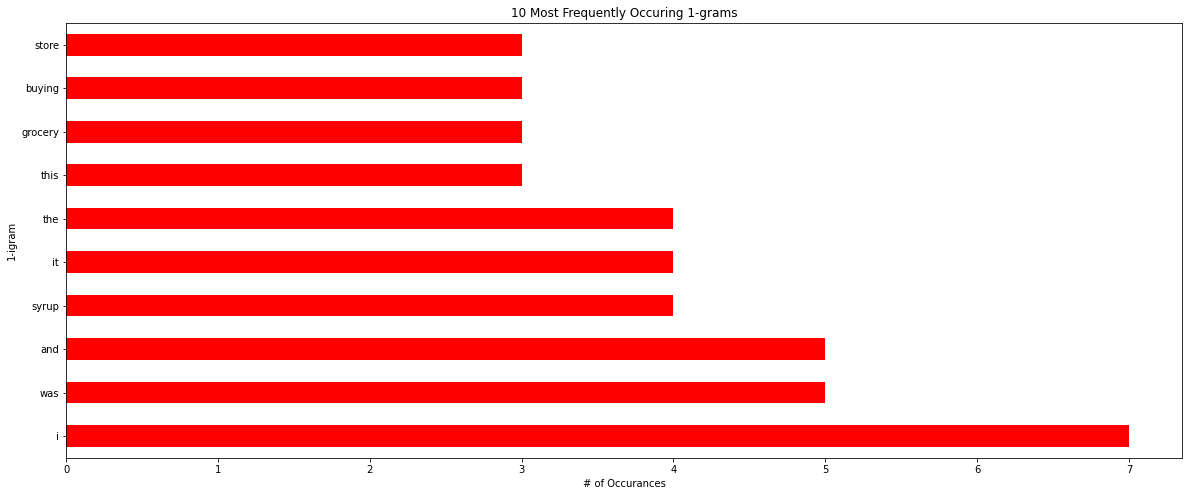

In [ ]:
from google.colab import files

# for i in range(1,11):
# todo; make a cloop from 1 - 6
i=1
bigram_series = (pd.Series(get_ngrams(i)).value_counts())[:10]
bigram_series.plot.barh(color='red', figsize=(20, 8))
plt.title(f'10 Most Frequently Occuring {i}-grams')
plt.ylabel(f'{i}-igram')
plt.xlabel('# of Occurances')
# files.download(f"unigram.jpg")

### One Hot Encoding
One Hot encoding is useful to convert textual data to more useful numeric form. This can be rescaled easily. We used One hot encoding for experimentation instead of binary encoding due to the speed of use. In binary encoding, the speed is relatively slower but the space is efficiently used.

Refrence used: https://www.edaboard.com/threads/the-difference-between-one-hot-and-binary-encoding.119912/

In [ ]:
from sklearn.preprocessing import OneHotEncoder

part1 = train_unique.head(50000)
df_new = pd.get_dummies(part1, columns=["clean_reviews"])

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 50002 entries, Score to clean_reviews_zukes are great training treats because they are small and quickly consumed so you can continue what you are working on   i have shopped everywhere for them and amazon is the best price i have found so we order them frequently  best price on zukes
dtypes: int64(1), object(6), uint8(49995)
memory usage: 2.3+ GB


Even though our research says that one hot encoding is faster, we found out that it is not the best way to reoresent such a large corpus. Therefore, we experimented further with otrher representation techniques.

In [ ]:
# creating a balanced subset. Over here, we are taking 1% of the whole dataset corresnposnding to each class. This is done for experimenting on a balnced subset of the whole imbalanced dataset. 
# We will be using this balanced subset for further experimentation until we find a superior model
score1=train_unique[train_unique['Score'] == 1].head(int(0.01*len(train_unique)))
score2= train_unique[train_unique['Score'] == 2].head(int(0.01*len(train_unique)))
score3 = train_unique[train_unique['Score'] == 3].head(int(0.01*len(train_unique)))
score4 = train_unique[train_unique['Score'] == 4].head(int(0.01*len(train_unique)))
score5 = train_unique[train_unique['Score'] == 5].head(int(0.01*len(train_unique)))
# train_subset=pd.DataFrame()2
train_subset = pd.concat([score1,score2,score3,score4,score5])

In [ ]:
imbalanced_subset = pd.DataFrame()

In [ ]:
# to create an imbalanced subset of train_unique.  Here, we are taking a 5% of each of the classes rather than a fixed value from all the classes equally. 
# This allows us to create perfect imbalanced dataset from the huge corpus.
# We will be using this subset for experimentation on the pipeline of all the models, and then train the best model with the whole dataset

score1 = train_unique[train_unique['Score'] == 1].head(int(0.05*len(train_unique[train_unique['Score'] == 1])))
score2 = train_unique[train_unique['Score'] == 2].head(int(0.05*len(train_unique[train_unique['Score'] == 2])))
score3 = train_unique[train_unique['Score'] == 3].head(int(0.05*len(train_unique[train_unique['Score'] == 3])))
score4 = train_unique[train_unique['Score'] == 4].head(int(0.05*len(train_unique[train_unique['Score'] == 4])))
score5 = train_unique[train_unique['Score'] == 5].head(int(0.05*len(train_unique[train_unique['Score'] == 5])))
imbalanced_subset = pd.concat([score1,score2,score3,score4,score5])

In [ ]:
imbalanced_subset.reset_index(drop=True) # to create a balanced dataset

Score                                        Review_text  \
0          1  This is the first coffee I tried when I got my...   
1          1  Don't buy these.  I have a very large German S...   
2          1  I wanted a sugar splurge but I chose these Sho...   
3          1  As a Chinese myself, I never brought any produ...   
4          1  This is nearly twice as expensive as the cost ...   
...      ...                                                ...   
15439      5  Great coffee, not too strong for by morning cu...   
15440      5  This is one of my favourite american chocolate...   
15441      5  My family really enjoys Grove Square Hot Cocoa...   
15442      5  This is a great dog food and our dogs do very ...   
15443      5  As an Italian I am used to eating very good ol...   

                                           clean_reviews  \
0      this is the first coffee i tried when i got my...   
1      do not buy these   i have a very large german ...   
2      i wanted a sugar splurge but i chose these sho...   
3      as a chinese myself  i never brought any produ...   
4      this is nearly twice as expensive as the cost ...   
...                                                  ...   
15439  great coffee  not too strong for by morning cu...   
15440  this is one of my favourite american chocolate...   
15441  my family really enjoys grove square hot cocoa...   
15442  this is a great dog food and our dogs do very ...   
15443  as an italian i am used to eating very good ol...   

                                            spacy_tokens  \
0      ['coffee', 'tried', 'got', 'keurig', '  ', 'di...   
1      ['buy', '  ', 'large', 'german', 'shepherd', '...   
2      ['wanted', 'sugar', 'splurge', 'chose', 'short...   
3      ['chinese', ' ', 'brought', 'product', 'low', ...   
4      ['nearly', 'twice', 'expensive', 'cost', 'nesp...   
...                                                  ...   
15439  ['great', 'coffee', ' ', 'strong', 'morning', ...   
15440  ['favourite', 'american', 'chocolates', ' ', '...   
15441  ['family', 'enjoys', 'grove', 'square', 'hot',...   
15442  ['great', 'dog', 'food', 'dogs', '  ', 'partic...   
15443  ['italian', 'eating', 'good', 'olives', ' ', '...   

                                             nltk_tokens  \
0      ['first', 'coffee', 'tried', 'got', 'keurig', ...   
1      ['buy', 'large', 'german', 'shepherd', 'cut', ...   
2      ['wanted', 'sugar', 'splurge', 'chose', 'short...   
3      ['chinese', 'never', 'brought', 'product', 'lo...   
4      ['nearly', 'twice', 'expensive', 'cost', 'nesp...   
...                                                  ...   
15439  ['great', 'coffee', 'strong', 'morning', 'cup'...   
15440  ['one', 'favourite', 'american', 'chocolate', ...   
15441  ['family', 'really', 'enjoys', 'grove', 'squar...   
15442  ['great', 'dog', 'food', 'dog', 'well', 'parti...   
15443  ['italian', 'used', 'eating', 'good', 'olive',...   

                                            keras_tokens  \
0      [9, 8, 1, 105, 41, 2, 93, 52, 2, 146, 13, 561,...   
1      [39, 10, 81, 28, 2, 15, 4, 34, 363, 1752, 2965...   
2      [2, 416, 4, 100, 4799, 16, 2, 2179, 28, 91, 13...   
3      [22, 4, 1516, 448, 2, 156, 1084, 98, 37, 22, 2...   
4      [9, 8, 872, 778, 22, 275, 22, 1, 403, 23, 3627...   
...                                                  ...   
15439  [27, 41, 10, 66, 214, 11, 91, 332, 113, 3, 136...   
15440  [9, 8, 38, 7, 13, 3869, 1094, 1207, 641, 18, 1...   
15441  [13, 292, 64, 1495, 3764, 2068, 141, 538, 148,...   
15442  [9, 8, 4, 27, 103, 59, 3, 112, 186, 39, 34, 88...   
15443  [22, 71, 905, 2, 47, 109, 6, 217, 34, 26, 1474...   

                                           porter_tokens  \
0      ['first', 'coffe', 'tri', 'got', 'keurig', 'di...   
1      ['buy', 'larg', 'german', 'shepherd', 'cut', '...   
2      ['want', 'sugar', 'splurg', 'chose', 'shortbre...   
3      ['chines', 'never', 'brought', 'product', 'low...   
4      ['nearli', 

### Term Frequency (TF)
Reference used: https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558

We are using Term fequency only for the purpose of experimentation andthis will ot be used in the pipeline as TF-IDF would clearly be a better choice. As per our research, we found out that it gives better features for learing compared to TF. By incorporating IDF into the formulae, we reduce the weight given to common words and it emphasises on the not-so-common words in the corpus



In [ ]:
first_sentence = "Data Science is the greatest job of the 21st century"
second_sentence = "Artificial Intelligence is not only the greatest job but it is a lifestyle in the 21st century" # taking any 2 random sentences for TF

first_sentence = first_sentence.split(" ")
second_sentence = second_sentence.split(" ")#join them to remove common duplicate words
total= set(first_sentence).union(set(second_sentence)) # the total variable is used to join all unique words from both the sentences
print(total)

{'only', 'Intelligence', 'not', 'is', 'Artificial', '21st', 'century', 'Science', 'in', 'but', 'it', 'job', 'Data', 'greatest', 'lifestyle', 'the', 'of', 'a'}


In [ ]:
# these steps are to just create a dictionary
wordDictA = dict.fromkeys(total, 0) 
wordDictB = dict.fromkeys(total, 0)
for word in first_sentence:
    wordDictA[word]+=1
    
for word in second_sentence:
    wordDictB[word]+=1

In [ ]:
pd.DataFrame([wordDictA, wordDictB])

only  Intelligence  not  is  Artificial  21st  century  Science  in  but  \
0     0             0    0   1           0     1        1        1   0    0   
1     1             1    1   2           1     1        1        0   1    1   

   it  job  Data  greatest  lifestyle  the  of  a  
0   0    1     1         1          0    2   1  0  
1   1    1     0         1          1    2   0  1

In [ ]:
# This is a simple function which is used to ciomputer the Term Frequency of the given dictionary created above and the wole document
def computeTF(wordDict, doc):
    tfDict = {}
    corpusCount = len(doc)
    for word, count in wordDict.items():
        tfDict[word] = count/float(corpusCount)
    return(tfDict)

In [ ]:
tfFirst = computeTF(wordDictA, first_sentence)
tfSecond = computeTF(wordDictB, second_sentence)

In [ ]:
tf = pd.DataFrame([tfFirst, tfSecond])

In [ ]:
tf

only  Intelligence       not        is  Artificial      21st   century  \
0  0.000000      0.000000  0.000000  0.100000    0.000000  0.100000  0.100000   
1  0.058824      0.058824  0.058824  0.117647    0.058824  0.058824  0.058824   

   Science        in       but        it       job  Data  greatest  lifestyle  \
0      0.1  0.000000  0.000000  0.000000  0.100000   0.1  0.100000   0.000000   
1      0.0  0.058824  0.058824  0.058824  0.058824   0.0  0.058824   0.058824   

        the   of         a  
0  0.200000  0.1  0.000000  
1  0.117647  0.0  0.058824

In [ ]:
# remove the stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# After removing the stopwords from the words, we then print out the filtered sentence
filtered_sentence = [w for w in wordDictA if not w in stop_words]
print(filtered_sentence)

['Intelligence', 'Artificial', '21st', 'century', 'Science', 'job', 'Data', 'greatest', 'lifestyle']


### TF-IDF 
TF-IDF is a mathematical formula which takes the product of TF and IDF. Here, TF is combined with IDF, which shows how significant that term is to the whyole corpus.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_subset.clean_reviews, train_subset.Score, test_size=0.3, random_state=42,stratify=train_subset.Score) # Simple train test split with 30% for testing and the Score feature is stratified.
X_train.head()

6216     just got these in this week and made a fantast...
38785    for the price  i was hoping for a lot more fla...
10371    great crackers   but for those who say these a...
49       i wanted a sugar splurge but i chose these sho...
8800     i am pretty much apathetic to this flavor  to ...
Name: clean_reviews, dtype: object

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train) # calling the tfidf vectorizer and fitting X_train.

TfidfVectorizer()

In [ ]:
X_train_tfidf = vectorizer.transform(X_train)

In [ ]:
X_train_tfidf

<10811x21948 sparse matrix of type '<class 'numpy.float64'>'
	with 632964 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_tfidf.shape)


(10811, 21948)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# compute the cosine similarity matrix
# this is done to see how the documents are similar to each other irrespective of the size.
# Caution: this code takes a long time to execute if the whole dataset is used
cosine_sim = cosine_similarity(X_train_tfidf, X_train_tfidf)

In [ ]:
from sklearn.manifold import MDS
# compute the MDS coordinates
# Caution: this code takes a long time to execute if the whole dataset is used
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

Jaccard coefficient  for tf-idf 
representation ??


In [ ]:
#Visualize TF-IDF
# Caution: this code takes a long time to execute if the whole dataset is used

pos = mds.fit_transform(cosine_sim)

In [ ]:
y_train

6216     3
38785    2
10371    1
49       1
8800     3
        ..
38128    3
4888     1
23424    3
1256     5
35632    2
Name: Score, Length: 10811, dtype: int64

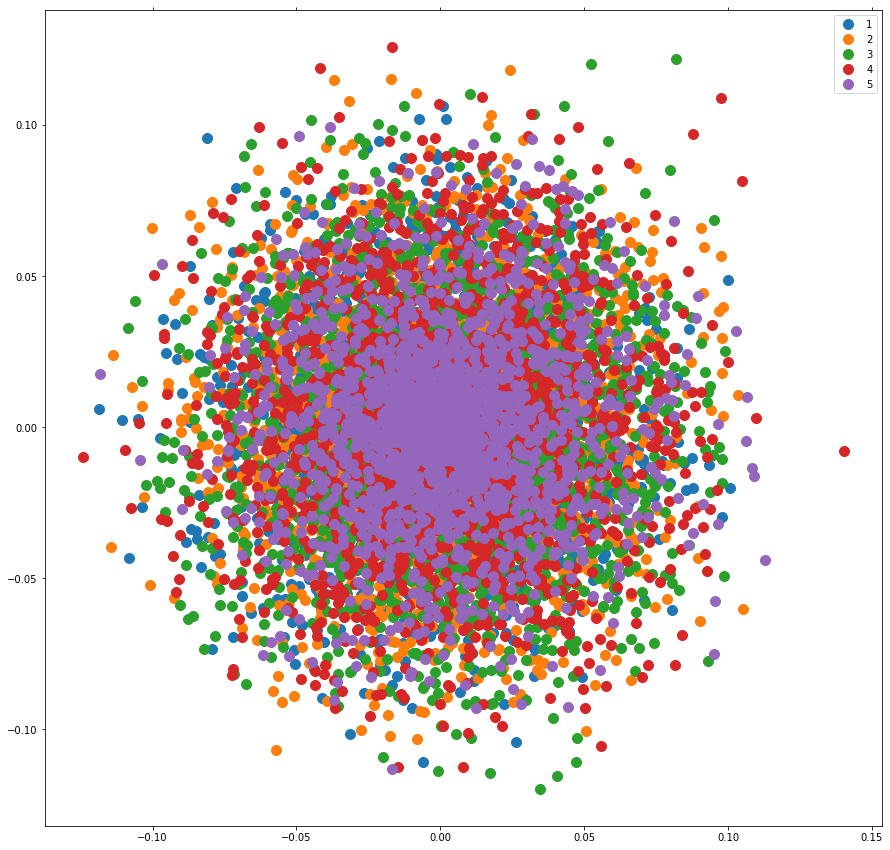

In [ ]:
xs, ys = pos[:, 0], pos[:, 1]

# create dataframe
vistfidf_df = pd.DataFrame(dict(x=xs, y=ys, label=y_train))

# group by label
groups = vistfidf_df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(15, 15))
ax.margins(0.05)

# plot each group
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=name)
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both', left='off', top='off', labelleft='off')
    ax.legend(numpoints=1)

plt.show()

### Avg-Word2Vec
https://www.kaggle.com/code/inspector/word2vec-logistic-regression-0-88-auc 

Why are we using Word2Vec?
* Until now, we have taken the vectors of words and completely ignored the context or semantics. 
* Word2Vec is used to create a vector representation of the words in a contextually-aware manner.

Word2Vec can be implemented in 2 ways:
1. Skip gram - In this model, a word is inputted into the neural network, and the context is predicted. It usually predicts the 2 previous and suceeding words.
This ML model consists of 1 input layer, one hidden layer and an ouput layer.
2. CBOW (Continous Bag Of Words) - This model words on a different methodology. Instead of predicting the context of the words, the current word is predicted. This is essectially the reverse of Skip gram.

It is found that CBOW is found to train faster than skip-gram models. But, Skip-gram works better with small datasets according to [Google's Word2Vec paper](https://arxiv.org/pdf/1301.3781.pdf).

In [ ]:
# Experiment 2
from gensim.models import Word2Vec
from bs4 import BeautifulSoup 
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import linear_model

In [ ]:
def avg_word_vectors(wordlist,size):
    sumvec=np.zeros(shape=(1,size))
    wordcnt=0
    
    for w in wordlist:
        if w in model:
            sumvec += model[w]
            wordcnt +=1
    
    if wordcnt ==0:
        return sumvec # returns a vector of zero for reviews containing words where none of them met the min_count or were not seen in the training set
    
    else:
        return sumvec / wordcnt # return an average of the embeddings vectors

In [ ]:
train_unique.head()

Score                                        Review_text  \
0      5  I received this product early from the seller!...   
1      5  *****<br />Numi's Collection Assortment Melang...   
2      5  I was very careful not to overcook this pasta,...   
3      5  Buying this multi-pack I was misled by the pic...   
4      5  These bars are so good! I loved them warmed up...   

                                       clean_reviews  \
0  i received this product early from the seller ...   
1        numi collection assortment melange inclu...   
2  i was very careful not to overcook this pasta ...   
3  buying this multi pack i was misled by the pic...   
4  these bars are so good  i loved them warmed up...   

                                        spacy_tokens  \
0  ['received', 'product', 'early', 'seller', ' '...   
1  ['      ', 'numi', 'collection', 'assortment',...   
2  ['careful', 'overcook', 'pasta', ' ', 'making'...   
3  ['buying', 'multi', 'pack', 'misled', 'picture...   
4  ['bars', 'good', ' ', 'loved', 'warmed', ' ', ...   

                                         nltk_tokens  \
0  ['received', 'product', 'early', 'seller', 'ta...   
1  ['numi', 'collection', 'assortment', 'melange'...   
2  ['careful', 'overcook', 'pasta', 'making', 'su...   
3  ['buying', 'multi', 'pack', 'misled', 'picture...   
4  ['bar', 'good', 'loved', 'warmed', 'definitely...   

                                        keras_tokens  \
0  [2, 309, 9, 37, 1485, 46, 1, 745, 21, 19, 4, 3...   
1  [2268, 2593, 1761, 2202, 1274, 406, 550, 110, ...   
2  [2, 20, 34, 1087, 10, 6, 9, 370, 338, 200, 6, ...   
3  [226, 9, 2427, 191, 2, 20, 91, 1, 914, 18, 199...   
4  [28, 277, 19, 25, 26, 2, 297, 29, 3676, 65, 2,...   

                                       porter_tokens  \
0  ['receiv', 'product', 'earli', 'seller', 'tast...   
1  ['numi', 'collect', 'assort', 'melang', 'inclu...   
2  ['care', 'overcook', 'pasta', 'make', 'sure', ...   
3  ['buy', 'multi', 'pack', 'misl', 'pictur', 'wh...   
4  ['bar', 'good', 'love', 'warm', 'definit', 'th...   

                                     snowball_tokens  
0  ['receiv', 'product', 'earli', 'seller', 'tast...  
1  ['numi', 'collect', 'assort', 'melang', 'inclu...  
2  ['care', 'overcook', 'pasta', 'make', 'sure', ...  
3  ['buy', 'multi', 'pack', 'misl', 'pictur', 'wh...  
4  ['bar', 'good', 'love', 'warm', 'definit', 'th...

In [ ]:
# train_unique['binary_score'] = train_unique['Score'].apply(binarize_score)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(train_unique['nltk_tokens'], train_unique['Score'], test_size=0.2, random_state=42)

In [ ]:
#train word2vec on 80% of training data
model = Word2Vec(X_train_w2v.values, size=400, window=5, min_count=5, workers=4) # Here, the window is the max distance from the predicted word and the current word.
# and min-count is a hyperparameter whihc is used to ignore all the words with total frequncy les than 5. Workers are simply the number of worker threads. This is an optional parameter

In [ ]:
X_train_w2v=np.concatenate([avg_word_vectors(w,400) for w in X_train_w2v])
X_test_w2v=np.concatenate([avg_word_vectors(w,400) for w in X_test_w2v])

In [ ]:
print(len(X_train_w2v))
print(len(y_train_w2v))

247147
247147


In [ ]:
clf = linear_model.SGDClassifier(loss='log')
clf.fit(X_train_w2v, y_train_w2v)# After creating a W2V model, we trained in on an SGD classifier just to plot the graph for each corresponding score.

SGDClassifier(loss='log')

In [ ]:
p=clf.predict_proba(X_test_w2v)

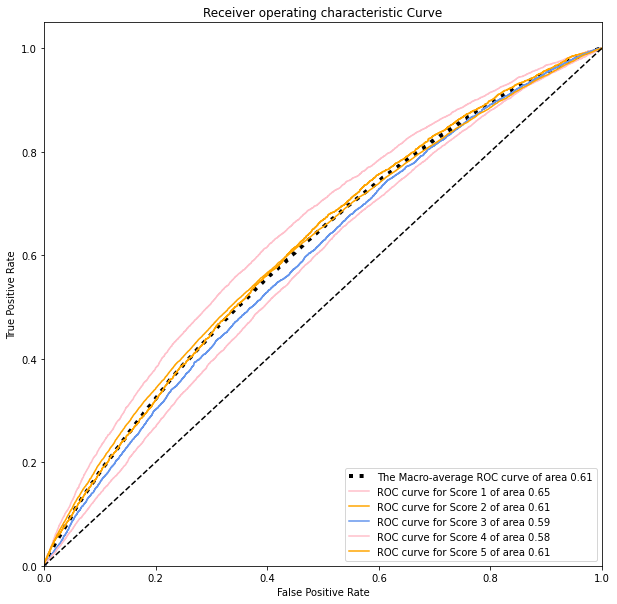

In [ ]:
# multi class ROC AUC
# code adapted from @Megha Sharma's DMML Coursework
from sklearn.metrics import roc_curve, auc
from itertools import cycle
y_scores = clf.predict_proba(X_test_w2v)

# create dummies to mimick the binary class
y_dummies = pd.get_dummies(y_test_w2v, drop_first=False).values
# get dummies function turns the categories to encodings of 0 and 1

# For each class, the ROC curve and area is computed using ROC_CURVE function and AUC function
fprs = {} # the false positive rate
tprs = {} # the true positive rate
aucs = {} # the area under the curve


for i in range(5):
    # roc_curve calculates the false positve and true positve rate
    # for multi class we calculate it per class
    fprs[i], tprs[i], _ = roc_curve(y_dummies[:, i], y_scores[:, i])

for i in range(5):
    # auc calculates the area under the curve
    # for multi class we calculate it per class
    aucs[i] = auc(fprs[i], tprs[i])

# getting false positive rates
unique_fprs = np.unique(np.concatenate([fprs[i] for i in range(5)]))

# To calculate the mean true positive rate
mean_tpr = np.zeros(unique_fprs.shape)
for i in range(5):
    mean_tpr += np.interp(unique_fprs, fprs[i], tprs[i])

# averaging the true positive rates
mean_tpr /= 5

fprs["macro"] = unique_fprs
tprs["macro"] = mean_tpr
aucs["macro"] = auc(fprs["macro"], tprs["macro"])

# plotting the curves
plt.figure(figsize = (10,10))
plt.plot(fprs["macro"], tprs["macro"],
         label='The Macro-average ROC curve of area {0:0.2f}'.format(aucs["macro"]),
         color='black', linestyle=':', linewidth=4)

colors = cycle(['pink', 'orange', 'cornflowerblue'])
for i, color in zip(range(5), colors):
    plt.plot(fprs[i], tprs[i], color=color,
             label='ROC curve for Score {0} of area {1:0.2f}'.format(i+1, aucs[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Write observations from this plot, what can we infer from this.

### Glove representation
This is used to get the relatioship between the words using statistics. It is an unsupervised learning algorithm for producing vector representations. The resultant representations highlight intriguing linear substructures of the word vector space based on aggregated global word-word co-occurrence statistics from a corpus. https://www.kaggle.com/code/hassanamin/glove-based-text-classification/notebook



In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [ ]:
t = Tokenizer()
t.fit_on_texts(train_subset.clean_reviews) # Here, train_subset is used instead of the whole dataset for experimentation purposes.

In [ ]:
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(train_subset.clean_reviews)
print(encoded_docs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Creating Fixed Length Vectors Using Padding
max_length = 20
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 273   48   87 ...  498  378   27]
 [   3  116    4 ... 2185   12 4694]
 [ 306  152  913 ... 2498 1289   56]
 ...
 [ 873   99   24 ...  203 6060   34]
 [ 109    8   43 ...   72   10   34]
 [  90  269    1 ...  148  109  226]]


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-03-28 12:05:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-03-28 12:05:08--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-03-28 12:05:08--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
# creating an embeddings matrix
#  we need to create a matrix of one embedding for each word in the training dataset. 
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Time to fit the model:

The key difference is that the embedding layer can be seeded with the GloVe word embedding weights. We chose the 100-dimensional version, therefore the Embedding layer must be defined with output_dim set to 100. Finally, we do not want to update the learned word weights in this model, therefore we will set the trainable attribute for the model to be False.

In [ ]:
# Creating Model Using GloVe Embedding
from keras.layers.recurrent import LSTM

model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=20, trainable=False)
model.add(e)
model.add(LSTM(100))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           2565300   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 2,646,205
Trainable params: 80,905
Non-trainable params: 2,565,300
_________________________________________________________________
None


In [ ]:
padded_docs.shape

(15445, 20)

In [ ]:
def onehotencoding(scores):
    encoded = []
    for score in scores:
        enc = [0,0,0,0,0]
        enc[score-1] = 1
        encoded.append(enc)
    return np.array(encoded)

In [ ]:
y_train = onehotencoding(train_subset.Score)

One hot enc > label encoding. Wuth Label encoding, the LSTM model gives us 20%, but with a smimple change of y_train with one_hot encoding increased the accuracy to 54%

In [ ]:
# fit the model
model.fit(padded_docs, y_train, epochs=5, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, y_train, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 55.539012


In [ ]:
cdcdS

NameError: ignored

### Summary

Now we completed experimentation of the dataset using various representation techniques as follows: One Hot Encoding, TF, TF-IDF (Chosen), Avg-Word2Vec and Glove. All of these representation techniques have used on a subset of the dataset due to the size and complexity of the whole dataset.

From all these representation techniques, we found out that TF-IDF is the best representation technique. We came to this conclusion taking the space, time and the dataset into consideration.

Each technique has been explained in all their respective section and why we have chosen them for experimentation.

* Applications like clustering & topic modelling have reported to work better with raw term frequencies 

* Stemming or Lemmatization?
Stemming useful when mining very small documents like discussion board posts or tweets. Studies have shown that techniques like stemming can sometimes degrade classification accuracy when working with larger documents. [Charu C. Aggarwal. “Machine Learning for Text.”]

## 4. Model training, selection and hyperparameter tuning and evaluation
This chapter deals with all the machine learning models we used. This is the penultimate phase, right before
evaluation. We have strategically selected a few machine learning models before delving into Deep learning
models. We created a pipeline to experiment with all the representation techniques, N-Gram’s and vectorizer’s
against 3 widely used and researched models. The pipeline is run on a subset of the whole dataset due to the
time and computational constraints. After experimenting with the pipeline, we use the best model against the
whole dataset.

In [ ]:
X_train.apply(str)

In [ ]:
test.apply(str)

In [ ]:
# Function that returns a pipeline given a vectorizer, classifier and [dim_reducer] 
from sklearn.pipeline import Pipeline
def makePipeline(vectorizer, classifier, dim_reducer = None):
    steps = [('vectorize', vectorizer)]
    
    if dim_reducer:
        steps.append(('dim_reduce', dim_reducer))
    
    steps.append(('classify', classifier))

    return Pipeline(steps)

In [ ]:
train_unique.head()

In [ ]:
df = train_subset
df = df.reset_index(drop=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from numpy import mean

### Pipeline
We created a pipeline to experiment with all the representation techniques, N-Gram's and vectorizer's against 3 widely used and researched models. The pipeline is run on a stratified subset of the whole dataset due to the time and computational constraints. After experimenting with the pipeline, we use the best model against the whole dataset.

The pipeline was created to experiment against researched machine learning models. Taking the best model from the list of researched models makes our model robust.

In [ ]:


fields = ['Review Type', 'N-Grams', 'Vectorizer', 'Model', 'Precision', 'Recall', 'Accuracy', 'F1']
table = defaultdict(list)

# Using Stratification to make sure that proportions of classes remain the same in the training and test splits 
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=22)


for representation in ('spacy_tokens', 'nltk_tokens', 'snowball_tokens','porter_tokens'):
    for n_grams in (1,2,3):
        for vectorizer in (CountVectorizer(ngram_range=(n_grams,n_grams), lowercase= False), \
            TfidfVectorizer(ngram_range=(n_grams,n_grams), lowercase= False),\
                CountVectorizer(binary=True, ngram_range=(n_grams,n_grams), lowercase= False)):
                for model in (MultinomialNB(), SGDClassifier(), LogisticRegression()):
                    scores = defaultdict(list)
                    for train_idx, test_idx in cv.split(df, df['Score']):
                        
                        X_train, X_test = df[representation][train_idx], df[representation][test_idx]
                        y_train, y_test = df['Score'][train_idx], df['Score'][test_idx] 
                        X_train=X_train.apply(str)
                        X_test=X_test.apply(str)
                        pipeline = makePipeline(vectorizer=vectorizer, classifier=model)
                        
                        pipeline.fit(X_train, y_train)
                        y_pred = pipeline.predict(X_test)

                        scores['Precision'].append(precision_score(y_test, y_pred, average=None))
                        scores['Recall'].append(recall_score(y_test, y_pred, average=None))
                        scores['F1'].append(f1_score(y_test, y_pred, average=None))
                        scores['Accuracy'].append(accuracy_score(y_test, y_pred))
                    
                    if n_grams == 1:
                        n_grams_str = 'Unigram'
                    elif n_grams == 2:
                        n_grams_str = 'Bigram'
                    else:
                        n_grams_str = 'Trigram'
                    
                    for field, value in (("Review Type", representation), ("N-Grams", n_grams_str), \
                        ("Vectorizer", str(vectorizer)), ("Model", str(model))): 

                        table[field].append(value)

                    for field in fields[4:]:
                        table[field].append(mean(scores[field]))

In [ ]:
table_df = pd.DataFrame(table)

In [ ]:
table_df.head()

Review Type  N-Grams                        Vectorizer  \
0  spacy_tokens  Unigram  CountVectorizer(lowercase=False)   
1  spacy_tokens  Unigram  CountVectorizer(lowercase=False)   
2  spacy_tokens  Unigram  CountVectorizer(lowercase=False)   
3  spacy_tokens  Unigram  TfidfVectorizer(lowercase=False)   
4  spacy_tokens  Unigram  TfidfVectorizer(lowercase=False)   

                  Model  Precision    Recall  Accuracy        F1  
0       MultinomialNB()   0.453006  0.452642  0.452640  0.452064  
1       SGDClassifier()   0.426010  0.429264  0.429263  0.427073  
2  LogisticRegression()   0.450557  0.453090  0.453091  0.451518  
3       MultinomialNB()   0.460670  0.456070  0.456070  0.456304  
4       SGDClassifier()   0.458254  0.476009  0.476011  0.456622

In [ ]:
table_df.shape

(135, 8)

In [ ]:
table_df[max(table_df['Accuracy']) == table_df['Accuracy']]

Review Type  N-Grams                        Vectorizer  \
59      tokens  Unigram  TfidfVectorizer(lowercase=False)   

                   Model  Precision    Recall  Accuracy        F1  
59  LogisticRegression()   0.507663  0.514016  0.514018  0.509901

In [ ]:
table_df.to_csv("results_ml.csv", encoding='utf8', index=False)

In [ ]:
table_df[max(table_df['F1']) == table_df['F1']]

Review Type  N-Grams                        Vectorizer  \
59      tokens  Unigram  TfidfVectorizer(lowercase=False)   

                   Model  Precision    Recall  Accuracy        F1  
59  LogisticRegression()   0.507663  0.514016  0.514018  0.509901

### Results

In [ ]:
results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Results ML models/pipeline_balanced_results_ml.csv')
results.head()

Review Type  N-Grams                        Vectorizer  \
0  spacy_tokens  Unigram  CountVectorizer(lowercase=False)   
1  spacy_tokens  Unigram  CountVectorizer(lowercase=False)   
2  spacy_tokens  Unigram  CountVectorizer(lowercase=False)   
3  spacy_tokens  Unigram  TfidfVectorizer(lowercase=False)   
4  spacy_tokens  Unigram  TfidfVectorizer(lowercase=False)   

                  Model  Precision    Recall  Accuracy        F1  
0       MultinomialNB()   0.453006  0.452642  0.452640  0.452064  
1       SGDClassifier()   0.426010  0.429264  0.429263  0.427073  
2  LogisticRegression()   0.450557  0.453090  0.453091  0.451518  
3       MultinomialNB()   0.460670  0.456070  0.456070  0.456304  
4       SGDClassifier()   0.458254  0.476009  0.476011  0.456622

In [ ]:
results.sort_values(by='Accuracy', ascending=False).head()

Review Type  N-Grams                                         Vectorizer  \
59      tokens  Unigram                   TfidfVectorizer(lowercase=False)   
68      tokens   Bigram  TfidfVectorizer(lowercase=False, ngram_range=(...   
58      tokens  Unigram                   TfidfVectorizer(lowercase=False)   
67      tokens   Bigram  TfidfVectorizer(lowercase=False, ngram_range=(...   
66      tokens   Bigram  TfidfVectorizer(lowercase=False, ngram_range=(...   

                   Model  Precision    Recall  Accuracy        F1  
59  LogisticRegression()   0.507663  0.514016  0.514018  0.509901  
68  LogisticRegression()   0.496290  0.502690  0.502688  0.497762  
58       SGDClassifier()   0.482630  0.499903  0.499902  0.481547  
67       SGDClassifier()   0.486413  0.496603  0.496601  0.484573  
66       MultinomialNB()   0.513792  0.496345  0.496342  0.500272

In [ ]:
results.groupby('Model')['Accuracy'].max()

Model
LogisticRegression()    0.514018
MultinomialNB()         0.496342
SGDClassifier()         0.499902
Name: Accuracy, dtype: float64

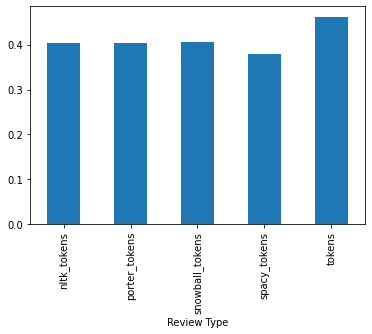

In [ ]:
results.groupby('Review Type')['Accuracy'].mean().plot(kind='bar')

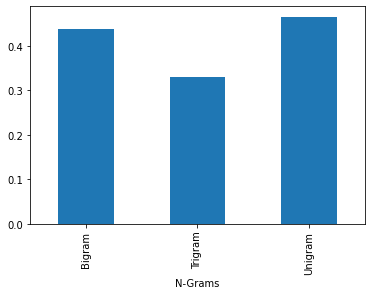

In [ ]:
results.groupby('N-Grams')['Accuracy'].mean().plot(kind='bar')

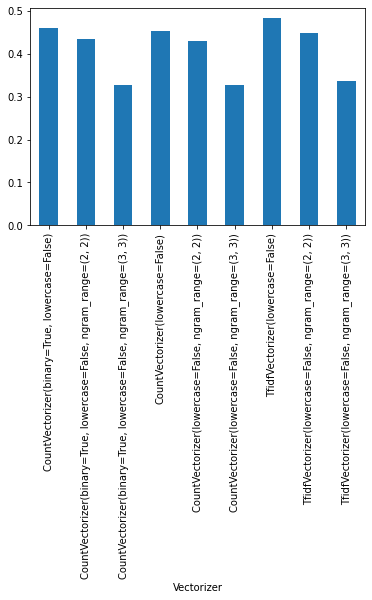

In [ ]:
results.groupby('Vectorizer')['Accuracy'].mean().plot(kind='bar')

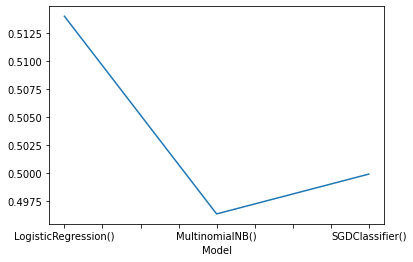

In [ ]:
results.groupby('Model')['Accuracy'].max().plot(kind='line')

### Hyperparameter tuning and evaluation

Based on our results we found that the Logistic Regression gave us the best results with a Unigram TF-IDF vectorizer, however to improve on the results we performed a grid search on the hyper parameters of the Logistic Regression model. We fine tuned on the 'C' (Inverse of regularization strength)  and the 'penalty' hyper parameter 


In [ ]:
# grid search on best model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

vectorizer=TfidfVectorizer(lowercase=False, ngram_range=(1,1))

X_train_tfidf = imbalanced_subset['nltk_tokens'].apply(str)
X_train_tfidf = vectorizer.fit_transform(X_train_tfidf)

params = { 'C': [0.001, 0.01, 0.1, 1, 10],
          'penalty': ['l2', 'none'],}

grid_search = GridSearchCV(estimator = LogisticRegression(),
                            param_grid = params,
                            scoring = 'f1',
                            return_train_score=True,
                            cv=5)

grid_search.fit(X_train_tfidf, imbalanced_subset['Score'])

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l2', 'none']},
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_estimator_

LogisticRegression(C=0.001)

We noted that the default 'lbfgs' solver is best for multi-class models, and can only work with 'l2' and 'none' penalty. Based, on this, we could improve our accuracy to 73\% on the final complete dataset. The testing accuracy over the model resulted up to 64\% on kaggle.

In [ ]:
# training on the best model
# for the best model -> LogisticRegression()

scores = defaultdict(list)
representation = 'tokens' # keras tokens
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=22)
pipeline = makePipeline(vectorizer=TfidfVectorizer(lowercase=False, ngram_range=(1,1)), classifier=LogisticRegression(C=0.001))

for train_idx, test_idx in cv.split(df, df['Score']):
    X_train, X_test = df[representation][train_idx], df[representation][test_idx]
    y_train, y_test = df['Score'][train_idx], df['Score'][test_idx] 
    X_train=X_train.apply(str)
    X_test=X_test.apply(str)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    scores['Precision'].append(precision_score(y_test, y_pred, average=None))
    scores['Recall'].append(recall_score(y_test, y_pred, average=None))
    scores['F1'].append(f1_score(y_test, y_pred, average=None))
    scores['Accuracy'].append(accuracy_score(y_test, y_pred))

In [ ]:
log_results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Results ML models/Logistic_Balanced_final_scores_ml.csv')
log_results.head()

Precision  \
0  [0.65146161 0.38997214 0.42990033 0.46334056 0...   
1  [0.65065224 0.37896071 0.45847632 0.48006858 0...   
2  [0.66416382 0.37181208 0.44887955 0.48616932 0...   
3  [0.66       0.37409201 0.44726811 0.47459835 0...   
4  [0.63750402 0.3987034  0.43697479 0.47744175 0...   

                                              Recall  \
0  [0.70884306 0.17083588 0.27780163 0.24289288 0...   
1  [0.71478504 0.18242831 0.28694158 0.25466121 0...   
2  [0.6799441  0.16900549 0.27534364 0.26381624 0...   
3  [0.6918239  0.18852959 0.3024055  0.24857858 0...   
4  [0.69276477 0.15009152 0.29037801 0.21901296 0...   

                                                  F1  Accuracy  
0  [0.67894208 0.23759016 0.33750652 0.31871083 0...  0.733767  
1  [0.68121252 0.24629325 0.35297226 0.33278859 0...  0.737263  
2  [0.67196133 0.23238255 0.34132055 0.34203155 0...  0.734900  
3  [0.67553736 0.25070994 0.36084059 0.32626866 0...  0.735968  
4  [0.6639866  0.21808511 0.34890323 0.30028064 0...  0.733856

In [ ]:
log_results.describe()

Accuracy
count  10.000000
mean    0.734257
std     0.001592
min     0.731395
25%     0.733518
50%     0.734001
75%     0.734825
max     0.737263

## 5. Modelling text as a Sequence
Sequence Models parses sequential data such as text corpora for analysing and performing sequence functionalities such as classification and generation. Here we will be experimenting with LSTM and transformer models


######References used: https://www.kaggle.com/vikashrajluhaniwal/sentiment-analysis-using-lstm-in-keras-93-acc

In [ ]:
# importing the libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D, CuDNNLSTM
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np

In [ ]:
# apply tokenisation and stop word removal and lemma
imbalanced_subset['sequence'] = imbalanced_subset['nltk_tokens'].apply(lambda x: " ".join(x))

In [ ]:
imbalanced_subset.reset_index(drop=True,inplace=True)

In [ ]:
imbalanced_subset['sequence'].head()

In [ ]:
imbalanced_subset.head()

In [ ]:
imbalanced_subset.shape

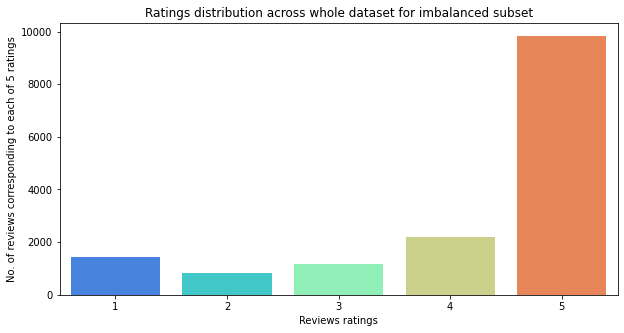

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Score',data=imbalanced_subset,palette='rainbow')
#sns.countplot()
plt.title('Ratings distribution across whole dataset for imbalanced subset')
plt.xlabel('Reviews ratings')
plt.ylabel("No. of reviews corresponding to each of 5 ratings")
plt.show()

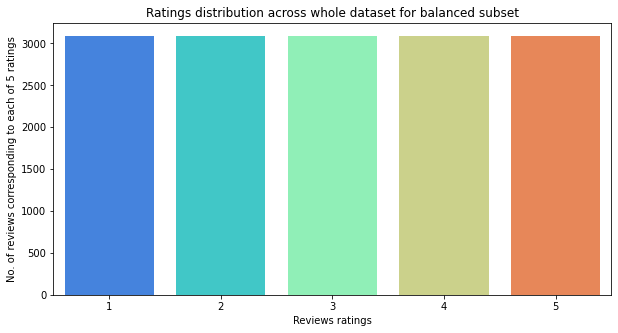

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Score',data=train_subset,palette='rainbow')
#sns.countplot()
plt.title('Ratings distribution across whole dataset for balanced subset')
plt.xlabel('Reviews ratings')
plt.ylabel("No. of reviews corresponding to each of 5 ratings")
plt.show()

In [ ]:
imbalanced_subset = train_unique

We pad the sequences to ensure the data is kept in the same size

In [ ]:
# padding sequences to be the same shape
max_len = 1000
padded_seq = sequence.pad_sequences(imbalanced_subset['keras_tokens'], maxlen = max_len, padding='post')
padded_seq.shape

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the dataset
x_train, x_val, y_train, y_val = train_test_split(imbalanced_subset['clean_reviews'], imbalanced_subset['Score'], test_size = 0.2, random_state=42, stratify=imbalanced_subset['Score'])
print("Training data size : ", x_train.shape)
print("Test data size : ", x_val.shape)

In [ ]:
# turning labels to one hot encoding
# this makes it easier for the models to learn using softmax activation
enc_train = onehotencoding(y_train)
enc_val = onehotencoding(y_val)

Text Vectorisation helps to create vector representations of a piece of text. Deep learning models can only input numerical representations hence we use this to create such

In [ ]:
embedding_vecor_length = 32
VOCAB_SIZE = 100000
sequence_length = 100

encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=sequence_length)

encoder.adapt(train_unique['clean_reviews'])

In [ ]:
batch_size = 200
vocab_size = len(encoder.get_vocabulary())
max_len = 100

### LSTM Model
LSTM is a sepcial RNN model that uses feedback connections for selective memory to improve over larfe sequences. It is useful in NLP tasks such as ours. Here we use the general LSTM, a BiLSTM and a LSTM+Attention


In [ ]:
# creating a simple LSTM model 
lstm_model = Sequential([
            tf.keras.Input(shape=(1,), dtype=tf.string),
            encoder,
            Embedding(vocab_size, embedding_vecor_length, input_length=max_len),
            LSTM(100),
            Dense(5,activation='softmax')
        ])
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 100)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 100, 32)           3200000   
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 3,253,705
Trainable params: 3,253,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# lstm_model.fit(x_train,enc_train, epochs=5, batch_size=640, validation_split=0.3)

### BiLSTM
A Bidirectional LSTM (BiLSTM) Model processes sequences with two LSTMs one for forward and for backward, this allows us to capture more data and improve performance.

In [ ]:
# creating a BiLSTM model
bilstm_model = Sequential([
            tf.keras.Input(shape=(1,), dtype=tf.string),
            encoder,
            Embedding(vocab_size, embedding_vecor_length, input_length=max_len, mask_zero=True),
            Bidirectional(LSTM(100)),
            Dense(64, activation='relu'),
            Dense(5, activation='softmax')
        ])

bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

bilstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 100)              0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 100, 32)           3200000   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              106400    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 64)                12864     
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 3,319,589
Trainable params: 3,319,589
No

In [ ]:
# bilstm_model.fit(x_train,enc_train, epochs=5, batch_size=640, validation_split=0.3)

### LSTM + Attention Model
Attention is a relatively new concept that allows models to retain specific memory for each word, i.e. different words are given different attention. We used BiLSTM + Attention to further improve the perfomance of the model
##### The Attention module is adopted from the reference below: https://stackoverflow.com/questions/62948332/how-to-add-attention-layer-to-a-bi-lstm

In [ ]:
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [ ]:
latt_model = Sequential([
            tf.keras.Input(shape=(1,), dtype=tf.string),
            encoder,
            Embedding(vocab_size, embedding_vecor_length, input_length=max_len),
            Bidirectional(LSTM(100, return_sequences=True)),
            Attention(return_sequences=False),
            Dense(5, activation='softmax')
        ])

latt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

latt_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 100)              0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 100, 32)           3200000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 200)         106400    
 nal)                                                            
                                                                 
 attention (Attention)       (None, 200)               300       
                                                                 
 dense_4 (Dense)             (None, 5)                 1005      
                                                                 
Total params: 3,307,705
Trainable params: 3,307,705
No

In [ ]:
# latt_model.fit(x_train,enc_train, epochs=5, batch_size=640, validation_split=0.3)

### Pipeline

This function will create a pipeline with a model and train and evaluate the data on the train validation split. It returns the prediction on the validation set for scoring in the main loop

In [ ]:
# function for implementing sequence model pipeline
def sequence_pipeline(model_type):
    # loads LSTM model
    if model_type == 'lstm':
        model = Sequential([
                            tf.keras.Input(shape=(1,), dtype=tf.string),
            encoder,Embedding(vocab_size, embedding_vecor_length, input_length=max_len),
            LSTM(100),
            Dense(5,activation='softmax')
        ])
    # loads BiLSTM model
    elif model_type == 'bilstm':
        model = Sequential([
                            tf.keras.Input(shape=(1,), dtype=tf.string),
            encoder,Embedding(vocab_size, embedding_vecor_length, input_length=max_len, mask_zero=True),
            Bidirectional(LSTM(100)),
            Dense(64, activation='relu'),
            Dense(5, activation='softmax')
        ])
    # loads LSTM+Attention model
    elif model_type == 'lstmattention':
        model = Sequential([
                            tf.keras.Input(shape=(1,), dtype=tf.string),
            encoder,Embedding(vocab_size, embedding_vecor_length, input_length=max_len),
            Bidirectional(LSTM(100, return_sequences=True)),
            Attention(return_sequences=False),
            Dense(5, activation='softmax')
        ])
    else:
        print("You have entered an incorrect model type, please choose from: lstm, bilstm, lstmattention")

    print(model.summary())
    # compiles using categorical cross entropy as it is meant for multi-class 
    # classification
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # return the predictions
    return model


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from numpy import mean

fields = ['Tokenizer', 'Model', 'Precision', 'Recall', 'Accuracy', 'F1']
table = defaultdict(list)

# Using Stratification to make sure that proportions of classes remain the same in the training and test splits 
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=22)

# Code to test on imbalanced dataset
df = imbalanced_subset
# Code to test on balanced dataset
df = train_subset

# for the representations
for tokenizer in ['clean_reviews']:
  # for the model types
  for model in ['lstm', 'bilstm', 'lstmattention']:
    scores = defaultdict(list)
    model = sequence_pipeline(model)
    for train_idx, test_idx in cv.split(df, df['Score']):
        
        X_train, X_test = df[tokenizer][train_idx], df[tokenizer][test_idx]
        y_train, y_test = df['Score'][train_idx], df['Score'][test_idx] 
        enc_train = onehotencoding(y_train)

        # train the model
        model.fit(x_train,enc_train, epochs=5, batch_size=200, validation_split=0.3)
        
        # predict on the validation set
        y_pred = model.predict(x_test, verbose = 2, batch_size = 200)
        # print(y_pred)
        y_pred = np.argmax(y_pred, axis=1)
        y_pred += 1
        # print(y_pred)        
        

        scores['Precision'].append(precision_score(y_test, y_pred, average=None))
        scores['Recall'].append(recall_score(y_test, y_pred, average=None))
        scores['F1'].append(f1_score(y_test, y_pred, average=None))
        scores['Accuracy'].append(accuracy_score(y_test, y_pred))
    
    
    for field, value in (("Tokenizer", str(tokenizer)), ("Model", str(model))): 
        table[field].append(value)

    for field in fields[2:]:
        table[field].append(mean(scores[field]))



In [ ]:
table_final_df = pd.DataFrame(table)
table_final_df.to_csv("table_final_imbalanced_df.csv",encoding='utf8', index=False)

In [ ]:
table_balanced_df = pd.DataFrame()
table_balanced_df.to_csv("table_final_balanced_df.csv",encoding='utf8', index=False)

### BERT Transformer
BERT is a bidirectional transformer that is pretrained and uses mask language for prediction and classification tasks. Here we implement it using simpletransformers

###### Reference Used: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613

In [ ]:
hyperparameters = {
    'reprocess_input_data': True,
    'overwrite_output_dir': True,
    'sliding_window': True,
    'max_seq_length': 64,
    'num_train_epochs': 2,
    'learning_rate': 0.001,
    'weight_decay': 0.01,
    'train_batch_size': 128,
    'fp16': True,
    'output_dir': '/XLNEToutputs/',
}

In [ ]:
# For us to know what's being done while it's training
logging.basicConfig(level=logging.DEBUG)
transformers_logger = logging.getLogger('transformers')
transformers_logger.setLevel(logging.WARNING)

# cuda_available = torch.cuda.is_available()
# We use the BERT base cased pre-trained model.
model = ClassificationModel('bert', 'bert-base-cased', num_labels=5, args=hyperparameters,use_cuda=True) 

# Train the model
model.train_model(imbalanced_subset)

# Evaluate the model


### XLNet Transformer


In [ ]:
# For us to know what's being done while it's training
logging.basicConfig(level=logging.DEBUG)
transformers_logger = logging.getLogger('transformers')
transformers_logger.setLevel(logging.WARNING)

# cuda_available = torch.cuda.is_available()
# We use the XLNet base cased pre-trained model.
model = ClassificationModel('xlnet', 'xlnet-base-cased', num_labels=5, args=hyperparameters,use_cuda=True) 

# Train the model
model.train_model(imbalanced_subset)

# Evaluate the model


### Results
We performed an initial analysis with the 1% stratified subset of the data
1.   LSTM are easier to train but poorer in performance compared to Transformers
2.   Sequence model are much better at capturing information that classical ML models cannot predict such as correlations and sequential information.

In [ ]:
results = pd.read_csv('/content/drive/MyDrive/LSTM_Keras_imbalanced_df - LSTM_Keras_imbalanced_df.csv')
results.head()

In [ ]:
results.groupby('Model').mean()


Here we can see that with smaller data, LSTM+Attention still manages to outperform the other models, though it struggles with the imbalance of the dataset as seen in the F1 score. We can improve this by providing more data.

In [ ]:
results.sort_values(by='F1', ascending=False).head()

Based on the Kaggle dataset, our final conclusion are as follows:

* Sequence models outperform the results from the machine learning models. We see a jump of over 6\% moving from classical machine learning models
* We can train models to learn their own embeddings with deep learning models, which allows us to learn powerful business-specific embeddings.
* More parameters raises more complex behaviour and better performance. Eg. LSTM are easier to train but poorer in performance compared to Transformers. However, overly complex models can also over fit, as seen with the XLNet Transformer, where even training with 1 epoch made the model over fit on the test set. 
* The accuracy increase in sequence models suggest that studying the correlation and sequential information can improve the quality of our models.

## 6. Topic Modelling of high and low ratings

### Topic Model Visualization using pyLDAvis

pyLDAvis is an open-source python library that helps in analyzing and creating highly interactive visualization of the clusters created by LDA.  
Check this document on pyLADvis https://towardsdatascience.com/topic-model-visualization-using-pyldavis-fecd7c18fbf6
Below we generate the inteactrive visualizations for 10 topics and 100 topics for our movie review data set

### Generating the LDA model from the Scikit-Learn Library

In [ ]:
# Importing necessary packages for performing topic modelling using pyLDAvis
from sklearn.feature_extraction.text import CountVectorizer
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# !pip install mglearn
%matplotlib inline
import mglearn as mglearn
import matplotlib as plt

D:\anaconda3\envs\DMML\lib\site-packages\mglearn\plot_pca.py:7: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='cache'", use "location='cache'" instead.
  memory = Memory(cachedir="cache")
D:\anaconda3\envs\DMML\lib\site-packages\mglearn\plot_nmf.py:7: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='cache'", use "location='cache'" instead.
  memory = Memory(cachedir="cache")


In [ ]:
# train_preprocessed_df = pd.read_csv('/content/train_cleaned.csv')

In [ ]:
# Calling count vectorizer as the main model on the preprocessed_df to use in pyLDAvis
vect = CountVectorizer()

# Fitting and transforming the lemmatized text since it doesn't change the word. Using the stemming or lem-stem (combination) text would be insignificant since there 
# would be no words with the correct spelling and it would cause confusion when we wish to visualize the multiple topics.
X = vect.fit_transform(train_preprocessed_df["nltk_tokens"].apply(lambda x: x.lower()))

# Using LDA for performing topic modelling on our lemmatized data
from sklearn.decomposition import LatentDirichletAllocation

# We use LDA for 9 topics since we have used 9 different topics as our main data topics.
lda = LatentDirichletAllocation(n_components=9, learning_method="batch",max_iter=25, random_state=0)

# Fitting and transforming the count vectorized text onto the LDA for topic modelling
document_topics = lda.fit_transform(X)

#  The LDA components store (n topics, n words)
print("lda.components_.shape: {}".format(lda.components_.shape))

# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names_out())
#prints the most important words for each topic

# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(9), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

lda.components_.shape: (9, 92612)
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
product       tea           sauce         would         taste         
use           flavor        like          one           like          
oil           green         good          box           drink         
organic       taste         taste         bag           flavor        
ingredient    like          flavor        product       water         
hair          hot           make          like          sugar         
using         good          great         package       good          
also          love          use           good          bottle        
used          one           salt          get           would         
work          bag           add           review        one           


topic 5       topic 6       topic 7       topic 8       
--------      --------      --------      --------     

In [ ]:
# Visuzalize the best libraries results
pyLDAvis.sklearn.prepare(lda, X,vect) # visualization for 9 topics

D:\anaconda3\envs\DMML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\DMML\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.068297  0.024848       1        1  15.558031
3      0.136469 -0.022292       2        1  14.346838
2     -0.073339  0.032961       3        1  13.401748
7      0.154099 -0.200308       4        1  12.277771
6      0.105431  0.072086       5        1  11.025704
4     -0.065738  0.053603       6        1  10.412784
0      0.096318  0.168601       7        1   8.384884
8     -0.125711 -0.086876       8        1   7.805106
1     -0.159232 -0.042623       9        1   6.787134, topic_info=           Term          Freq         Total Category  logprob  loglift
80889       tea  92649.000000  92649.000000  Default  30.0000  30.0000
16100    coffee  95870.000000  95870.000000  Default  29.0000  29.0000
24007       dog  53417.000000  53417.000000  Default  28.0000  28.0000
31308      food  73604.000000  73604.000000  Default  27.0000  27.0000
2720     amazon  50665.000000  50665.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
29598  favorite   4125.654363  28070.365721   Topic9  -5.3689   0.7727
7785       best   4872.936248  59882.428355   Topic9  -5.2025   0.1815
54676      nice   3966.180693  26406.787998   Topic9  -5.4084   0.7943
66243    really   4269.510044  57032.198828   Topic9  -5.3347   0.0980
83860     tried   3801.580657  40717.990714   Topic9  -5.4507   0.3189

[734 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
636        3  0.000256   acid
636        6  0.087895   acid
636        7  0.728782   acid
636        8  0.181683   acid
636        9  0.001281   acid
...      ...       ...    ...
91530      9  0.044043   year
91760      9  0.998321   yogi
92376      6  0.997806  zevia
92394      6  0.998654   zico
92417      7  0.998106   zinc

[1956 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 8, 7, 5, 1, 9, 2])

### Insights For All Kinds of Reviews

- Topic 1: Snacks (cereal, food containing sugar, etc. )
- Topic 2: Orders and Packaging (package, received, product, etc.)
- Topic 3: Food Ingredients (Garlic, pepper, meat, cheese, etc.)
- Topic 4: Amazon services 
- Topic 5: Baby Pet Food (dog, cat, etc.)
- Topic 6: Drinks
- Topic 7: Hair Products
- Topic 8: Coffee products
- Topic 9: Tea products

From the above, we see topics like Amazon services, pets and drinks. This makes sense since the dataset is related to the Amazon platform and has a variety of food and drink options. We also see a topic related to Hair products. Let's visualize this further.

In [ ]:
pd.set_option('display.max_colwidth', 250)
train_preprocessed_df[train_preprocessed_df['nltk_tokens'].str.contains("hair")]['Review_text'][:5]

187                                              I like the mild fragrance of Clear Scalp & Hair Nourishing Shampoo. It has the essential vitamins that helps prevents my hair breakage to a good extent. The hair becomes silky and soft after usage. Effective
216    I have used this conditioner a couple of times and I find it be pretty average. It does have some of the botanical ingredients that I use such as sunflower and coconut oil but those are only a small fraction of a conditioner that basically has th...
376    I guarantee this product is and does all it says it does. I conducted a test trial on myself and over a month I noticed benefits in energy, memory, hair growth and overall better health. I take 1 oz each morning and within 20 min. I feet awake an...
398    Great for your hair.<br /><br />I've been worried about losing hair - after each shower, I found tons of hair on the show stall floor. That really scared me. A friend recommended something call Fo-Ti to me, and I googled i

As we can see, the dataset also contains reviews about shampoos anf conditioners. This is probably a mistake that was made during the data collection phase of the dataset.  

In [ ]:
# Creating separate dataframes for 1 star and 5 star reviews
train_1star = train_preprocessed_df[train_preprocessed_df['Score'] == 1]
train_5star = train_preprocessed_df[train_preprocessed_df['Score'] == 5]

In [ ]:
train_1star.head()

Score                                        Review_text  \
18      1  This is the first coffee I tried when I got my...   
31      1  Don't buy these.  I have a very large German S...   
49      1  I wanted a sugar splurge but I chose these Sho...   
55      1  As a Chinese myself, I never brought any produ...   
56      1  This is nearly twice as expensive as the cost ...   

                                        clean_reviews  \
18  this is the first coffee i tried when i got my...   
31  do not buy these   i have a very large german ...   
49  i wanted a sugar splurge but i chose these sho...   
55  as a chinese myself  i never brought any produ...   
56  this is nearly twice as expensive as the cost ...   

                                          nltk_tokens  \
18  ['first', 'coffee', 'tried', 'got', 'keurig', ...   
31  ['buy', 'large', 'german', 'shepherd', 'cut', ...   
49  ['wanted', 'sugar', 'splurge', 'chose', 'short...   
55  ['chinese', 'never', 'brought', 'product', 'lo...   
56  ['nearly', 'twice', 'expensive', 'cost', 'nesp...   

                                      snowball_tokens  \
18  ['first', 'coffe', 'tri', 'got', 'keurig', 'di...   
31  ['buy', 'larg', 'german', 'shepherd', 'cut', '...   
49  ['want', 'sugar', 'splurg', 'chose', 'shortbre...   
55  ['chines', 'never', 'brought', 'product', 'low...   
56  ['near', 'twice', 'expens', 'cost', 'nespresso...   

                                        porter_tokens  
18  ['first', 'coffe', 'tri', 'got', 'keurig', 'di...  
31  ['buy', 'larg', 'german', 'shepherd', 'cut', '...  
49  ['want', 'sugar', 'splurg', 'chose', 'shortbre...  
55  ['chines', 'never', 'brought', 'product', 'low...  
56  ['nearli', 'twice', 'expens', 'cost', 'nespres...

In [ ]:
train_1star = train_1star.reset_index(drop=True)
train_5star = train_5star.reset_index(drop=True)

In [ ]:
train_5star.head()

Score                                        Review_text  \
0      5  I received this product early from the seller!...   
1      5  *****<br />Numi's Collection Assortment Melang...   
2      5  I was very careful not to overcook this pasta,...   
3      5  Buying this multi-pack I was misled by the pic...   
4      5  These bars are so good! I loved them warmed up...   

                                       clean_reviews  \
0  i received this product early from the seller ...   
1  numi collection assortment melange includes   ...   
2  i was very careful not to overcook this pasta ...   
3  buying this multi pack i was misled by the pic...   
4  these bars are so good  i loved them warmed up...   

                                         nltk_tokens  \
0  ['received', 'product', 'early', 'seller', 'ta...   
1  ['numi', 'collection', 'assortment', 'melange'...   
2  ['careful', 'overcook', 'pasta', 'making', 'su...   
3  ['buying', 'multi', 'pack', 'misled', 'picture...   
4  ['bar', 'good', 'loved', 'warmed', 'definitely...   

                                     snowball_tokens  \
0  ['receiv', 'product', 'earli', 'seller', 'tast...   
1  ['numi', 'collect', 'assort', 'melang', 'inclu...   
2  ['care', 'overcook', 'pasta', 'make', 'sure', ...   
3  ['buy', 'multi', 'pack', 'misl', 'pictur', 'wh...   
4  ['bar', 'good', 'love', 'warm', 'definit', 'th...   

                                       porter_tokens  
0  ['receiv', 'product', 'earli', 'seller', 'tast...  
1  ['numi', 'collect', 'assort', 'melang', 'inclu...  
2  ['care', 'overcook', 'pasta', 'make', 'sure', ...  
3  ['buy', 'multi', 'pack', 'misl', 'pictur', 'wh...  
4  ['bar', 'good', 'love', 'warm', 'definit', 'th...

### Visualiaztion for 1 star reviews

In [ ]:
# Calling count vectorizer as the main model on the preprocessed_df to use in pyLDAvis
vect = CountVectorizer()

# Fitting and transforming the lemmatized text since it doesn't change the word. Using the stemming or lem-stem (combination) text would be insignificant since there 
# would be no words with the correct spelling and it would cause confusion when we wish to visualize the multiple topics.
X = vect.fit_transform(train_1star["nltk_tokens"].apply(lambda x: x.lower()))

# Using LDA for performing topic modelling on our lemmatized data
from sklearn.decomposition import LatentDirichletAllocation

# We use LDA for 9 topics since we have used 9 different topics as our main data topics (Expo related).
lda = LatentDirichletAllocation(n_components=9, learning_method="batch",max_iter=25, random_state=0)

# Fitting and transforming the count vectorized text onto the LDA for topic modelling
document_topics = lda.fit_transform(X)

#  The LDA components store (n topics, n words)
print("lda.components_.shape: {}".format(lda.components_.shape))

# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names_out())
#prints the most important words for each topic

# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(9), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)
# Q1 Can you interpret each of the topics below?
pyLDAvis.sklearn.prepare(lda, X,vect) # visualization for 9 topics

lda.components_.shape: (9, 29818)
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
oil           chocolate     food          tea           taste         
water         bar           cat           taste         like          
product       candy         ingredient    sugar         would         
coconut       taste         product       flavor        one           
organic       product       eat           like          flavor        
baby          peanut        corn          drink         good          
formula       cooky         would         product       even          
milk          like          dog           ingredient    bad           
popcorn       butter        fat           green         tried         
food          chip          high          juice         really        


topic 5       topic 6       topic 7       topic 8       
--------      --------      --------      --------     

C:\Users\Admin\anaconda3\envs\textanalytics\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Admin\anaconda3\envs\textanalytics\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.114096 -0.015647       1        1  21.097564
5     -0.027124  0.147641       2        1  18.406580
3      0.097765 -0.110365       3        1  10.349751
8      0.001532  0.196470       4        1   9.418913
2     -0.146686 -0.066055       5        1   9.200413
6      0.129368 -0.011919       6        1   9.007186
7     -0.125070  0.043486       7        1   8.840309
1      0.116899 -0.057445       8        1   7.015415
0     -0.160781 -0.126166       9        1   6.663869, topic_info=         Term          Freq         Total Category  logprob  loglift
4964   coffee   7296.000000   7296.000000  Default  30.0000  30.0000
26123     tea   5361.000000   5361.000000  Default  29.0000  29.0000
7775      dog   5351.000000   5351.000000  Default  28.0000  28.0000
26056   taste  13977.000000  13977.000000  Default  27.0000  27.0000
10198    food   7276.000000   7276.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
3105    brand    302.926366   2920.854410   Topic9  -5.6017   0.4423
14414    know    288.604160   3305.582166   Topic9  -5.6501   0.2702
15482    made    277.423309   3936.339354   Topic9  -5.6896   0.0560
26631    time    254.644665   4869.240190   Topic9  -5.7753  -0.2424
18033     one    260.179263  10245.410805   Topic9  -5.7538  -0.9647

[667 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
111        3  0.986039   acai
272        3  0.050235     ad
272        4  0.947298     ad
290        1  0.241433  added
290        3  0.496341  added
...      ...       ...    ...
29685      1  0.864744   yuck
29685      3  0.056633   yuck
29685      6  0.042475   yuck
29685      8  0.034851   yuck
29761      9  0.992100   zico

[1678 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 4, 9, 3, 7, 8, 2, 1])

#### Insights
- Topic 1: Food review adjectives (Mostly negative)
- Topic 2: Orders and Packaging
- Topic 3: Drink and Drink Ingredients
- Topic 4: Grocery Stuff
- Topic 5: Food and Food Ingredients
- Topic 6: Coffee and Ingredients
- Topic 7: Pet Food Reviews  (Adjectives of negative pet food)
- Topic 8: Chocolate and Chocolate Ingredients
- Topic 9: Baby Food Ingredients

1 star reviews had lots of negative words 

### Visualiaztion for 5 star reviews

In [ ]:
# Calling count vectorizer as the main model on the preprocessed_df to use in pyLDAvis
vect = CountVectorizer()

# Fitting and transforming the lemmatized text since it doesn't change the word. Using the stemming or lem-stem (combination) text would be insignificant since there 
# would be no words with the correct spelling and it would cause confusion when we wish to visualize the multiple topics.
X = vect.fit_transform(train_5star["nltk_tokens"].apply(lambda x: x.lower()))

# Using LDA for performing topic modelling on our lemmatized data
from sklearn.decomposition import LatentDirichletAllocation

# We use LDA for 9 topics since we have used 9 different topics as our main data topics.
lda = LatentDirichletAllocation(n_components=9, learning_method="batch",max_iter=25, random_state=0)

# Fitting and transforming the count vectorized text onto the LDA for topic modelling
document_topics = lda.fit_transform(X)

#  The LDA components store (n topics, n words)
print("lda.components_.shape: {}".format(lda.components_.shape))

# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names_out())
#prints the most important words for each topic

# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(9), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)
# Q1 Can you interpret each of the topics below?
pyLDAvis.sklearn.prepare(lda, X,vect) # visualization for 9 topics

lda.components_.shape: (9, 72115)
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
coffee        amazon        bar           dog           tea           
cup           price         taste         food          flavor        
flavor        store         like          cat           drink         
like          product       chocolate     love          taste         
great         great         good          treat         like          
taste         find          chip          one           green         
good          buy           butter        like          good          
one           good          calorie       great         great         
best          order         peanut        get           love          
love          love          free          would         one           


topic 5       topic 6       topic 7       topic 8       
--------      --------      --------      --------     

D:\anaconda3\envs\DMML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\DMML\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.224186 -0.090047       1        1  13.747278
5     -0.047004  0.086995       2        1  13.095013
6      0.084543  0.020178       3        1  12.942624
3     -0.086882  0.146963       4        1  11.645515
7     -0.055683 -0.037561       5        1  10.481249
2      0.108780  0.084153       6        1  10.325872
4      0.115676 -0.077278       7        1  10.063586
8      0.050146  0.012722       8        1   9.462541
0      0.054610 -0.146126       9        1   8.236324, topic_info=         Term          Freq         Total Category  logprob  loglift
63067     tea  61478.000000  61478.000000  Default  30.0000  30.0000
12467  coffee  56014.000000  56014.000000  Default  29.0000  29.0000
18649     dog  33013.000000  33013.000000  Default  28.0000  28.0000
2100   amazon  34079.000000  34079.000000  Default  27.0000  27.0000
24333    food  46987.000000  46987.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
65408   tried   4134.148053  26057.927420   Topic9  -5.0431   0.6556
19184   drink   3741.000950  20988.200348   Topic9  -5.1431   0.7720
38054    make   4393.869500  41187.651165   Topic9  -4.9822   0.2587
51642  really   3162.497374  33174.852656   Topic9  -5.3111   0.1462
70724   would   2881.235749  40176.895080   Topic9  -5.4042  -0.1385

[711 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
533        2  0.997913        acne
657        2  0.154140         add
657        3  0.447172         add
657        4  0.008366         add
657        5  0.000653         add
...      ...       ...         ...
71713      7  0.028797       yummy
71713      8  0.459575       yummy
71713      9  0.023230       yummy
71714      8  0.986512  yummyearth
71952      2  0.998377        zico

[1798 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 7, 4, 8, 3, 5, 9, 1])

#### Insights
- Topic 1: Orders and Packaging
- Topic 2: Toiletries
- Topic 3: Food and Food Ingredients
- Topic 4: Pet Food Reviews 
- Topic 5: Sweets
- Topic 6: Chocolate and Other Ingredients 
- Topic 7: Drinks
- Topic 8: Food for Kids
- Topic 9: Coffee and Ingredients

5 star reviews had lots of positive words

# Similarities and Dissimilarities Between 1 Star and 5 Star Reviews

We see some similarities and dissimilarities between the topics for the 1 star reviews and the 5 star reviews. The following topics are similar:

- Orders and Packaging
- Food and Food Ingredients
- Pet Food Reviews 
- Chocolate and Chocolate Ingredients
- Drinks
- Coffee and Ingredients 

The following topics are dissimilar:

- Food review adjectives (Mostly negative) (1 star reviews)
- Grocery Stuff (1 star reviews)
- Baby Food Ingredients (1 star reviews)
- Food for kids (5 star reviews)


### Since the SK-Learn library doesn't have a way to evaluate our LDA model, we will use the Gensim library for the same.

## Generating the LDA model from the Gensim library

*Reference Used: https://www.kaggle.com/code/ratul6/topic-modeling-of-amazon-food-reviews*

In [ ]:
# !pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=2975910ac041549bb53b7f1ca3103067ae0a30951880b4e6f2115a7dea6b151b
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
# Importing important libraries for gensim-based topic modelling 
import pyLDAvis
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import ast


In [ ]:
# Initializing an empty array fort storing a list of list for all nltk tokens
train_preprocessed_list = []

# Creating a loop that will store all the nltk tokens as a list inside a list in the train_preprocessed_list    
for list in train_preprocessed_df["nltk_tokens"]:
    res = ast.literal_eval(list)
    train_preprocessed_list.append(res)

In [ ]:
# Creating a dictionary for all nltk tokens (all words in reviews)
dictionary = corpora.Dictionary(train_preprocessed_list)

# Creating a bag of words model for all nltk tokens (all words in reviews)
doc_term_matrix = [dictionary.doc2bow(token) for token in train_preprocessed_list]

# Object for gensim LDA Model
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=10,
                random_state=100)

In [ ]:
# Prints out the topics as well as the number of words in each topic.
lda_model.print_topics(num_topics=10, num_words=10)

[(0,
  '0.027*"product" + 0.027*"oil" + 0.017*"use" + 0.010*"hair" + 0.010*"organic" + 0.009*"coconut" + 0.009*"using" + 0.008*"ingredient" + 0.008*"seed" + 0.008*"also"'),
 (1,
  '0.021*"chocolate" + 0.017*"like" + 0.017*"taste" + 0.017*"good" + 0.014*"bar" + 0.013*"snack" + 0.012*"great" + 0.010*"flavor" + 0.010*"love" + 0.009*"sweet"'),
 (2,
  '0.010*"day" + 0.010*"one" + 0.009*"work" + 0.008*"review" + 0.008*"time" + 0.007*"first" + 0.007*"back" + 0.006*"would" + 0.006*"know" + 0.006*"get"'),
 (3,
  '0.037*"food" + 0.032*"dog" + 0.019*"cat" + 0.018*"love" + 0.016*"treat" + 0.012*"like" + 0.011*"one" + 0.008*"eat" + 0.008*"would" + 0.007*"get"'),
 (4,
  '0.021*"flavor" + 0.019*"sauce" + 0.017*"salt" + 0.016*"hot" + 0.014*"like" + 0.013*"best" + 0.012*"taste" + 0.010*"popcorn" + 0.009*"pepper" + 0.008*"good"'),
 (5,
  '0.091*"coffee" + 0.034*"cup" + 0.016*"flavor" + 0.015*"good" + 0.014*"bean" + 0.014*"like" + 0.013*"taste" + 0.012*"great" + 0.010*"k" + 0.009*"one"'),
 (6,
  '0.022*"

### Observations:
The print_topics function on the LDA model gives out the weights that represents importance  of each word that belongs to the particular topic. For example, in topic 2, the word chocolate is more important as its weight is higher. This can be furthur explored by looking at the visualization provided below.

In [ ]:
# Display topic modelling evaluation results for Gensim LDA
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.063814  0.114711       1        1  17.606143
1      0.071231 -0.046623       2        1  13.412109
8      0.054038 -0.016965       3        1  12.216906
3     -0.097669  0.018842       4        1  11.699181
9      0.065298 -0.062943       5        1  10.413991
2     -0.250533  0.139462       6        1   8.018962
5      0.130681  0.021549       7        1   7.971661
0     -0.171174 -0.248312       8        1   6.590766
7      0.157715 -0.023182       9        1   6.233493
4      0.104227  0.103461      10        1   5.836789, topic_info=       Term          Freq         Total Category  logprob  loglift
141     tea  92758.000000  92758.000000  Default  30.0000  30.0000
306  coffee  94656.000000  94656.000000  Default  29.0000  29.0000
611     dog  48980.000000  48980.000000  Default  28.0000  28.0000
400    food  72981.000000  72981.000000  Default  27.0000  27.0000
307     cup  41302.000000  41302.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
212   would   4957.031580  89703.815598  Topic10  -5.0391  -0.0547
496  bottle   3129.481757  17415.390367  Topic10  -5.4991   1.1245
428   stuff   3214.991097  26564.616657  Topic10  -5.4721   0.7292
255   brand   3235.487418  32339.929379  Topic10  -5.4658   0.5389
295  really   3072.347635  57508.145116  Topic10  -5.5175  -0.0885

[748 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2225      7  0.201581   acid
2225      8  0.798214   acid
455       1  0.000040    add
455       2  0.061721    add
455       3  0.245106    add
...     ...       ...    ...
213      10  0.033785   year
5049      5  0.006549  yeast
5049      8  0.992920  yeast
1538      9  0.998230   yogi
936       3  0.999551   yuck

[2085 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 9, 4, 10, 3, 6, 1, 8, 5])

### Insights
- Topic 1: Orders and Packaging
- Topic 2: Healthy Snacks 
- Topic 3: Drinks  
- Topic 4: Baby pet food 
- Topic 5: Food items
- Topic 6: Negative Reviews 
- Topic 7: Coffee and Ingredients
- Topic 8: Hair Products
- Topic 9: Tea and Ingedients
- Topic 10: Movie Snacks

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Computing perplexity
# Since we have 308934 reviews, we will use the first 10000 reviews for computing perplexity as its more generalized.
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))


Perplexity:  -8.94913605533993


Since we got a -9 for the perplexity score, we got a measure of how surprised a model is of new data it has not seen before. This is measured as the normalized log-likelihood of the doc_term_matrix.


In [ ]:
# Computing coherence score for the gensim model
from gensim.models.coherencemodel import CoherenceModel

# We use c_v coherence measure as it is based on a sliding window, one-set segmentation of the top words and an indirect confirmation 
# measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity.
coherence_model_lda = CoherenceModel(model=lda_model, texts=train_preprocessed_list, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.44085640780846286


Since we got a 0.44 for the coherence score, it means that we have an average score that measures the relative distance between words within a topic. 



## Visualiaztion for 1 star reviews (with Gensim)

In [ ]:
# Initializing an empty array fort storing a list of list for all nltk tokens
train_preprocessed_list = []

# Creating a loop that will store all the nltk tokens as a list inside a list in the train_preprocessed_list    
for list in train_1star["nltk_tokens"]:
    res = ast.literal_eval(list)
    train_preprocessed_list.append(res)

In [ ]:
# Creating a dictionary for all nltk tokens (all words in reviews)
dictionary = corpora.Dictionary(train_preprocessed_list)

# Creating a bag of words model for all nltk tokens (all words in reviews)
doc_term_matrix = [dictionary.doc2bow(token) for token in train_preprocessed_list]

# Object for gensim LDA Model
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=10,
                random_state=100)

In [ ]:
# Prints out the topics as well as the number of words in each topic.
lda_model.print_topics(num_topics=10, num_words=10)

[(0,
  '0.046*"taste" + 0.036*"like" + 0.020*"coffee" + 0.017*"flavor" + 0.012*"bad" + 0.011*"good" + 0.011*"would" + 0.010*"one" + 0.010*"product" + 0.009*"tried"'),
 (1,
  '0.017*"like" + 0.013*"would" + 0.011*"one" + 0.008*"good" + 0.008*"hard" + 0.007*"cooky" + 0.007*"get" + 0.007*"eat" + 0.007*"piece" + 0.006*"cracker"'),
 (2,
  '0.031*"product" + 0.018*"amazon" + 0.016*"price" + 0.011*"buy" + 0.009*"one" + 0.009*"store" + 0.008*"item" + 0.008*"would" + 0.008*"pack" + 0.007*"box"'),
 (3,
  '0.014*"salt" + 0.014*"soup" + 0.013*"peanut" + 0.012*"product" + 0.010*"butter" + 0.010*"mix" + 0.009*"like" + 0.009*"would" + 0.009*"bean" + 0.007*"good"'),
 (4,
  '0.026*"sugar" + 0.020*"flavor" + 0.018*"chocolate" + 0.013*"taste" + 0.012*"ingredient" + 0.008*"natural" + 0.008*"like" + 0.008*"drink" + 0.008*"product" + 0.008*"juice"'),
 (5,
  '0.038*"coffee" + 0.032*"cup" + 0.025*"water" + 0.014*"k" + 0.013*"coconut" + 0.012*"bag" + 0.010*"pod" + 0.008*"keurig" + 0.008*"machine" + 0.007*"one"

In [ ]:
# Display topic modelling evaluation results for Gensim LDA
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.118526 -0.059145       1        1  17.616179
2     -0.079142  0.138199       2        1  15.025404
6     -0.100076  0.020679       3        1  11.630992
9      0.003763  0.182907       4        1  10.644119
1      0.039920  0.005984       5        1  10.241860
4      0.003877 -0.145325       6        1   8.753865
7     -0.235176 -0.079619       7        1   8.021227
8      0.069990 -0.068420       8        1   6.639577
3      0.041769 -0.053498       9        1   6.311748
5      0.136549  0.058238      10        1   5.115030, topic_info=       Term          Freq         Total Category  logprob  loglift
384     tea   5416.000000   5416.000000  Default  30.0000  30.0000
7    coffee   7317.000000   7317.000000  Default  29.0000  29.0000
24    taste  13918.000000  13918.000000  Default  28.0000  28.0000
60     food   7133.000000   7133.000000  Default  27.0000  27.0000
35      dog   4652.000000   4652.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
130    make    243.314106   3966.278469  Topic10  -5.5611   0.1818
438    good    237.630774   7148.496611  Topic10  -5.5848  -0.4310
19     like    247.242183  15102.004885  Topic10  -5.5451  -1.1392
384     tea    225.008216   5416.253632  Topic10  -5.6393  -0.2080
183    year    217.101018   2736.487492  Topic10  -5.6751   0.4389

[864 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
4842      1  0.014232          acai
4842      8  0.953517          acai
4842     10  0.014232          acai
7028      8  0.975544  accidentally
3641      8  0.984582      acquired
...     ...       ...           ...
76        9  0.023615          yuck
76       10  0.001027          yuck
3888     10  0.978587          zico
1447      3  0.014164           zip
1447     10  0.977323           zip

[3319 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 7, 10, 2, 5, 8, 9, 4, 6])

### Insights
- Topic 1: Food review adjectives (Mostly negative)
- Topic 2: Orders and Packaging
- Topic 3: Baby pet food  
- Topic 4: Bad Customer Service 
- Topic 5: Chewy Food
- Topic 6: Sweet Foods and Drinks 
- Topic 7: Healthy Food
- Topic 8: Tea and Ingedients
- Topic 9: Dishes/Food Items
- Topic 10: Coffee and Ingredients

In [ ]:
# Computing perplexity
# Since we have 308934 reviews, we will use the first 10000 reviews for computing perplexity as its more generalized.
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))


Perplexity:  -8.047514035248275


Since we got a -8 for the perplexity score, we got a measure of how surprised a model is of new data it has not seen before. This is measured as the normalized log-likelihood of the doc_term_matrix.

In [ ]:
# Computing coherence score for the gensim model
from gensim.models.coherencemodel import CoherenceModel

# We use c_v coherence measure as it is based on a sliding window, one-set segmentation of the top words and an indirect confirmation 
# measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity.
coherence_model_lda = CoherenceModel(model=lda_model, texts=train_preprocessed_list, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4292790318457045


Since we got a 0.42 for the coherence score, it means that we have an average score that measures the relative distance between words within a topic. 


## Visualiaztion for 5 star reviews (with Gensim)

In [ ]:
# Initializing an empty array fort storing a list of list for all nltk tokens
train_preprocessed_list = []

# Creating a loop that will store all the nltk tokens as a list inside a list in the train_preprocessed_list    
for list in train_5star["nltk_tokens"]:
    res = ast.literal_eval(list)
    train_preprocessed_list.append(res)

In [ ]:
# Creating a dictionary for all nltk tokens (all words in reviews)
dictionary = corpora.Dictionary(train_preprocessed_list)

# Creating a bag of words model for all nltk tokens (all words in reviews)
doc_term_matrix = [dictionary.doc2bow(token) for token in train_preprocessed_list]

# Object for gensim LDA Model
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=10,
                random_state=100)

In [ ]:
# Prints out the topics as well as the number of words in each topic.
lda_model.print_topics(num_topics=10, num_words=10)

[(0,
  '0.011*"cake" + 0.010*"work" + 0.010*"use" + 0.007*"well" + 0.007*"box" + 0.006*"product" + 0.006*"plastic" + 0.006*"easy" + 0.005*"time" + 0.005*"make"'),
 (1,
  '0.082*"coffee" + 0.029*"cup" + 0.016*"flavor" + 0.014*"like" + 0.014*"great" + 0.013*"taste" + 0.012*"good" + 0.011*"bean" + 0.010*"one" + 0.009*"best"'),
 (2,
  '0.022*"sauce" + 0.013*"flavor" + 0.013*"hot" + 0.013*"make" + 0.013*"rice" + 0.012*"soup" + 0.012*"great" + 0.011*"pasta" + 0.011*"use" + 0.011*"add"'),
 (3,
  '0.102*"tea" + 0.022*"flavor" + 0.018*"drink" + 0.016*"taste" + 0.013*"green" + 0.013*"like" + 0.010*"great" + 0.010*"good" + 0.009*"honey" + 0.009*"love"'),
 (4,
  '0.024*"best" + 0.019*"find" + 0.019*"amazon" + 0.017*"store" + 0.013*"year" + 0.012*"product" + 0.012*"found" + 0.011*"ever" + 0.009*"could" + 0.009*"one"'),
 (5,
  '0.052*"food" + 0.026*"cat" + 0.022*"dog" + 0.013*"love" + 0.008*"like" + 0.008*"product" + 0.008*"eat" + 0.007*"year" + 0.007*"old" + 0.007*"one"'),
 (6,
  '0.028*"treat" + 0

In [ ]:
# Display topic modelling evaluation results for Gensim LDA
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.120106  0.003843       1        1  13.436540
8      0.065194  0.060024       2        1  13.133871
7     -0.054977 -0.155086       3        1  12.276997
4     -0.155215 -0.157379       4        1  11.482805
6     -0.104957 -0.038650       5        1   9.714431
5     -0.122239  0.019685       6        1   9.221589
1      0.115749 -0.064834       7        1   8.548140
2      0.145845  0.073626       8        1   8.476915
3      0.166385  0.009651       9        1   7.725804
0     -0.175891  0.249121      10        1   5.982908, topic_info=       Term          Freq         Total Category  logprob  loglift
141     tea  61789.000000  61789.000000  Default  30.0000  30.0000
345  coffee  54576.000000  54576.000000  Default  29.0000  29.0000
322    food  45756.000000  45756.000000  Default  28.0000  28.0000
522     dog  29790.000000  29790.000000  Default  27.0000  27.0000
507   treat  20997.000000  20997.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
20      bag   2084.290884  24733.428769  Topic10  -5.4128   0.3425
327    make   2325.133695  42109.514173  Topic10  -5.3035  -0.0802
148     two   1827.507044  14449.442271  Topic10  -5.5443   0.7486
332     put   1615.880891  11951.477038  Topic10  -5.6674   0.8153
100     one   1750.535755  61733.162409  Topic10  -5.5873  -0.7466

[787 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
8365      10  0.996087       acai
382        1  0.120143        add
382        2  0.335792        add
382        3  0.000747        add
382        6  0.004135        add
...      ...       ...        ...
3969      10  0.877274      yeast
12413      9  0.997206      yerba
1269       9  0.998188       yogi
7496       4  0.996225       york
3989       6  0.997650  yorkshire

[2336 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 8, 5, 7, 6, 2, 3, 4, 1])

### Insights
- Topic 1: Sugary Snacks
- Topic 2: Liquids and sweets
- Topic 3: Order and Packaging  
- Topic 4: Good Customer Service 
- Topic 5: Chewy Food and Candy
- Topic 6: Baby Pet Food 
- Topic 7: Coffee and Ingredients
- Topic 8: Dishes/Food Items
- Topic 9: Tea and Ingredients
- Topic 10: Random words (Outlier)

In [ ]:
# Computing perplexity
# Since we have 308934 reviews, we will use the first 10000 reviews for computing perplexity as its more generalized.
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))


Perplexity:  -8.639551886396308


Since we got a -8.6 for the perplexity score, we got a measure of how surprised a model is of new data it has not seen before. This is measured as the normalized log-likelihood of the doc_term_matrix.

In [ ]:
# Computing coherence score for the gensim model
from gensim.models.coherencemodel import CoherenceModel

# We use c_v coherence measure as it is based on a sliding window, one-set segmentation of the top words and an indirect confirmation 
# measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity.
coherence_model_lda = CoherenceModel(model=lda_model, texts=train_preprocessed_list, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4347662073391677


Since we got a 0.43 for the coherence score, it means that we have an average score that measures the relative distance between words within a topic. 


## Kaggle competition and Conclusion
Finally we also implemented our best ML and sequence model for the Kaggle Competition. This training is done on the entire dataset

In [ ]:
# Function that returns a pipeline given a vectorizer, classifier and [dim_reducer] 
from sklearn.pipeline import Pipeline
def makePipeline(vectorizer, classifier, dim_reducer = None):
    steps = [('vectorize', vectorizer)]
    
    if dim_reducer:
        steps.append(('dim_reduce', dim_reducer))
    
    steps.append(('classify', classifier))

    return Pipeline(steps)

In [ ]:
df = train_unique
df = df.reset_index(drop=True)

In [ ]:
#Using NLTK_tokens, TF-IDF Vectorizer, LogisticRegression(), Unigram

from collections import defaultdict
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score


representation = 'tokens'
vectorizer = TfidfVectorizer(lowercase=False, ngram_range=(1,1))
classifier = LogisticRegression()

In [ ]:
# training on the best model
# for the best model -> LogisticRegression()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=22)
scores = defaultdict(list)
pipeline = makePipeline(vectorizer=vectorizer, classifier=classifier)


for train_idx, test_idx in cv.split(df, df['Score']):
    X_train, X_test = df[representation][train_idx], df[representation][test_idx]
    y_train, y_test = df['Score'][train_idx], df['Score'][test_idx] 
    X_train=X_train.apply(str)
    X_test=X_test.apply(str)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    scores['Precision'].append(precision_score(y_test, y_pred, average=None))
    scores['Recall'].append(recall_score(y_test, y_pred, average=None))
    scores['F1'].append(f1_score(y_test, y_pred, average=None))
    scores['Accuracy'].append(accuracy_score(y_test, y_pred))


In [ ]:
np.mean(scores['Accuracy'])

In [ ]:
test[representation].apply(str)

In [ ]:
# run after training
final_pred = pipeline.predict(test[representation].apply(str))

In [ ]:
# for Sequence model
# y_pred, _ = model.predict(test_df['clean_reviews'])
# y_pred = y_pred+1
# final_pred = y_pred

In [ ]:
final_df = pd.DataFrame({'Score': final_pred})

In [ ]:
final_df['Id'] = final_df.index
final_df.head()

In [ ]:
final_df['Id'] = final_df['Id'] +1
final_df.head()

In [ ]:
# final submission CSV
final_df.to_csv('final_pred_latt_shuffled_2.csv', encoding='utf8', index=False)

Through this course work we implemented different NLP techniques that allows us to appreciate the pipeline for text analytics. As part of the coursework, we also tested our models with an unknown test dataset on
kaggle.

With the growth of social media, online reviews are some of the popular methods for leaving sentimental
commentary on a product. This can be really important for businesses to keep track of consumer trends and
satisfaction, especially on large platforms such as Amazon. In fact, a popular dataset consists of reviews of
fine foods on Amazon from 1999 to 2012 (McAuley and Leskovec, 2013). In this coursework, we employed a
series of text analytics approaches and discussing the effect of each on this food review dataset. Based on our
submissions, we found that with large datasets, sequence models outperform machine learning models by 10%.

We also found that within machine learning vectorisation and nltk tokens performed the best on our dataset,
despite their lack of efficiency compared to Spacy tokens.
Our results compared with existing research on the dataset suggests that LSTMs are generally more powerful
over RNNs, and ultimately over machine learning models such as Logistic Regression (Akinmade, n.d.).

Lastly, we also performed topic modeling on our dataset and noted the pertaining topics on our dataset
ranged from food products such as food ingredients to orders and packaging. This helps us understand what
topics are discussed in the reviews.

Overall, this coursework was essential in practicing text analytics techniques and the exercise lead to many
meaningful learning outcomes. Such models can be used to deploy in business fields to create structure and
analyze textual data.

